### House Prices - Advanced Regression Techniques 

Code Workflow: 

•	Importing the data

•	Segregating the main data frame to numerical, ordinal and nominal data frames

•	Exploratory Data Analysis

    o	Checking the distribution of numerical features

    o   Fixing the skewness of highly skewed features

    o	Checking correlations

•	Data Preprocessing

    o	Handling missing values

    o	Mapping ordinal and Onehotencoding nominal features

•	Modeling

    o	Linear Regression 

    o	KNN Regressor

    o	Lasso Regression

    o	Ridge Regression




In [416]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [417]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [418]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [419]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [420]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1]:
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(train)
profile_report

ModuleNotFoundError: No module named 'pandas_profiling'

In [422]:
numerical_features_train_df = train.select_dtypes(include=[np.number])
categorical_features_train_df = train.select_dtypes(include=[np.object])

In [423]:
# Checking for skewness of all numerical variables

from scipy.stats import skew 
skewness = numerical_features_train_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [424]:
len(numerical_features_train_df.columns)

38

In [425]:
train_numerical_features = train.select_dtypes(include=[np.number]).columns
train_categorical_features = train.select_dtypes(include=[np.object]).columns
print('Total number of numerical features =  ', len(numerical_features_train_df.columns))
print('Total number of categorical features = ', len(categorical_features_train_df.columns))

Total number of numerical features =   38
Total number of categorical features =  43


In [426]:
#checking the null values in the training dataset

train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

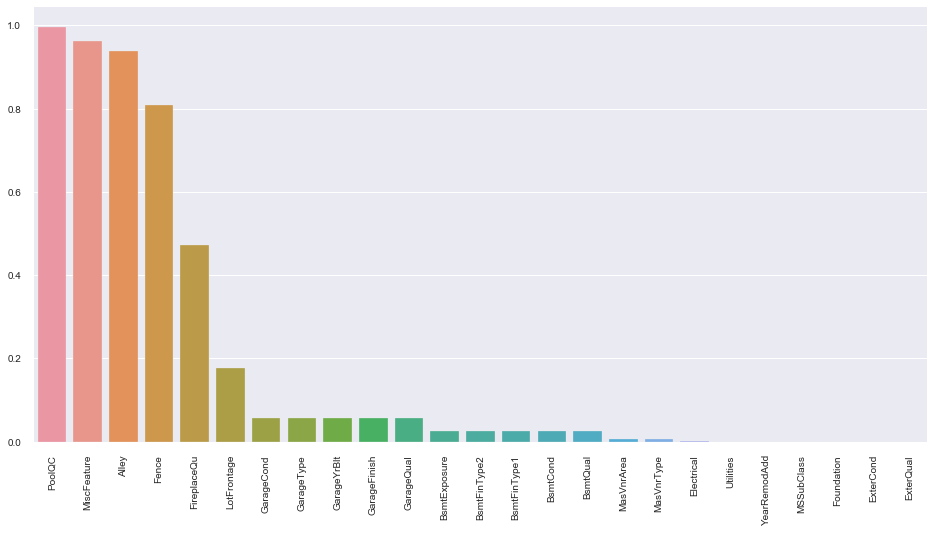

In [428]:
#plotting the barplot for missing values percentages

plt.figure(figsize=(16,8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index[0:25], y=percent[0:25])
plt.show()

### Explarotary Data Analysis


#### Numerical Variables

The Skewness of the SalePrce (target variable) is =  1.8828757597682129


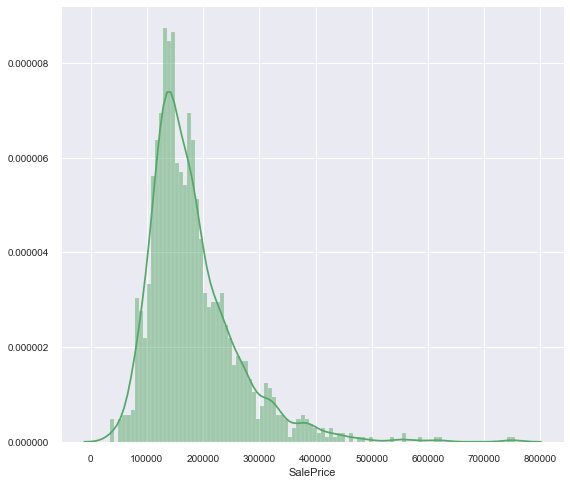

In [429]:
#checking the skewness of target variable

plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.5});
print('The Skewness of the SalePrce (target variable) is = ', train['SalePrice'].skew())

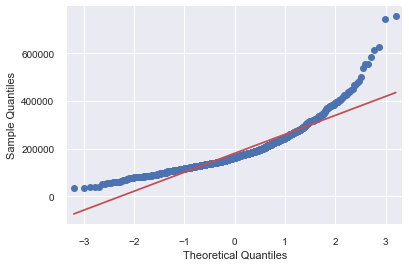

In [430]:
#Q-Q plot

from statsmodels.graphics.gofplots import qqplot
qqplot(train['SalePrice'], line='s')
plt.show()

The Skewness of the SalePrce (target variable) is =  0.6328002675557115


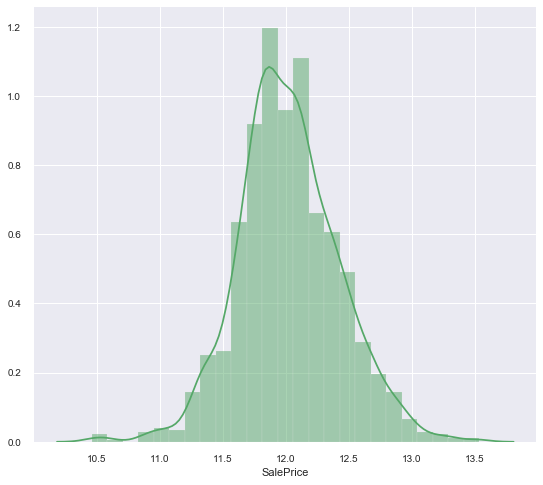

In [431]:
plt.figure(figsize=(9, 8))
sns.distplot(np.log(train['SalePrice']), color='g', bins=25, hist_kws={'alpha': 0.5});
print('The Skewness of the SalePrce (target variable) is = ', np.log(train['SalePrice'].skew()))

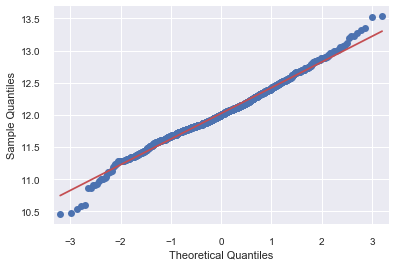

In [432]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(train['SalePrice']), line='s')
plt.show()

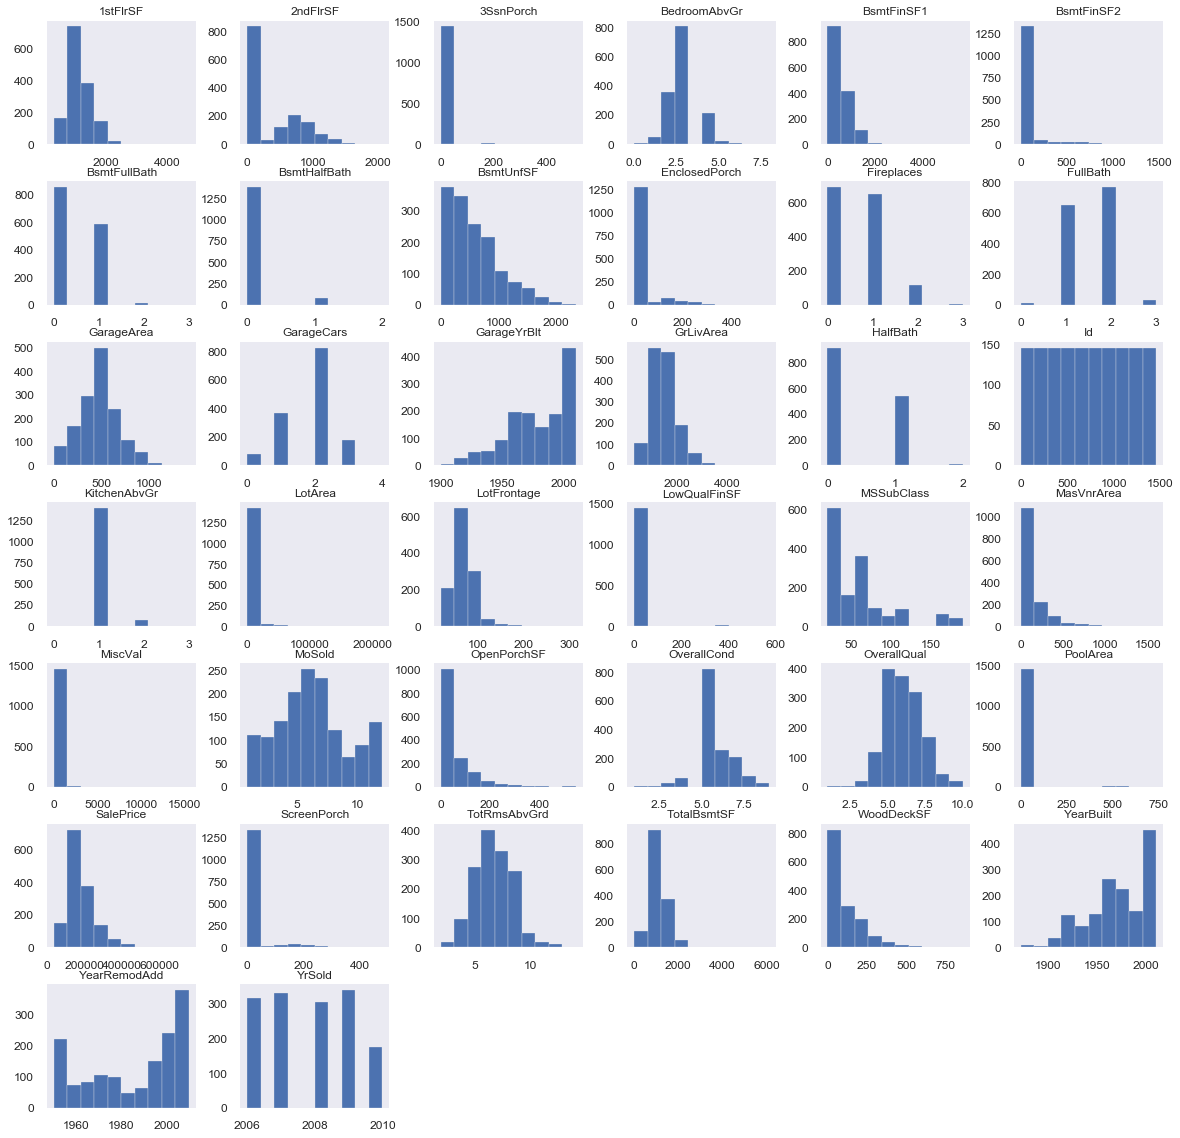

In [433]:
#checking the distribution of all numerical variables

numerical_features_train_df.hist(figsize = (20,20), xlabelsize=12, ylabelsize=12, grid=False)
plt.show()

In [434]:
#heatmap

corr = numerical_features_train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

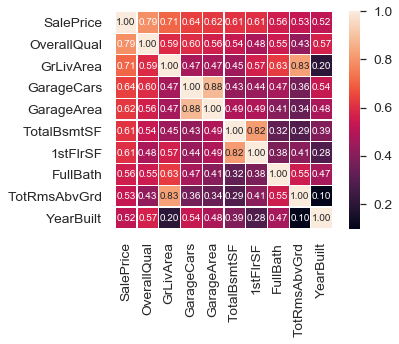

In [435]:
# heatmap of top-10 variables

cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(numerical_features_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar="YlGnBu", annot=True, square=True, linewidths=.2, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

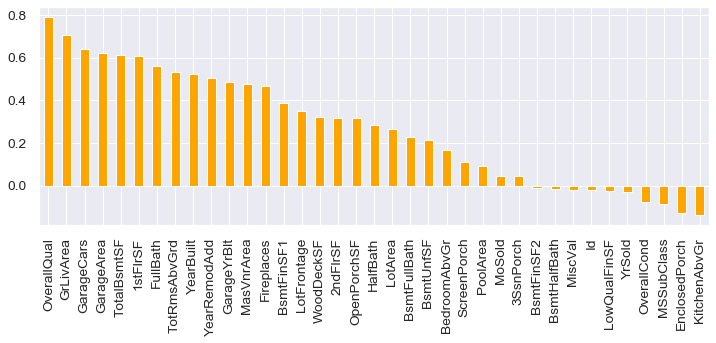

In [436]:
#bar plot of highly correlated variables with target variable

train.corr()['SalePrice'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(12, 4), color='orange')
plt.show()

#### Categorical Variables

In [437]:
print('No. of categorical variables are = ', len(categorical_features_train_df.columns))

No. of categorical variables are =  43


In [438]:
#checking the unique classes in each categorical varible

for feature in categorical_features_train_df:
    print('\nunique categories of', feature, 'are :')
    print(train[feature].unique())


unique categories of MSZoning are :
['RL' 'RM' 'C (all)' 'FV' 'RH']

unique categories of Street are :
['Pave' 'Grvl']

unique categories of Alley are :
[nan 'Grvl' 'Pave']

unique categories of LotShape are :
['Reg' 'IR1' 'IR2' 'IR3']

unique categories of LandContour are :
['Lvl' 'Bnk' 'Low' 'HLS']

unique categories of Utilities are :
['AllPub' 'NoSeWa']

unique categories of LotConfig are :
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

unique categories of LandSlope are :
['Gtl' 'Mod' 'Sev']

unique categories of Neighborhood are :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

unique categories of Condition1 are :
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

unique categories of Condition2 are :
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

unique

In [439]:
#checking the count of unique categories in categorical variables

for col in categorical_features_train_df:
    print('column name:', col)
    print('number of items: ',categorical_features_train_df[col].nunique())
    print('')

column name: MSZoning
number of items:  5

column name: Street
number of items:  2

column name: Alley
number of items:  2

column name: LotShape
number of items:  4

column name: LandContour
number of items:  4

column name: Utilities
number of items:  2

column name: LotConfig
number of items:  5

column name: LandSlope
number of items:  3

column name: Neighborhood
number of items:  25

column name: Condition1
number of items:  9

column name: Condition2
number of items:  8

column name: BldgType
number of items:  5

column name: HouseStyle
number of items:  8

column name: RoofStyle
number of items:  6

column name: RoofMatl
number of items:  8

column name: Exterior1st
number of items:  15

column name: Exterior2nd
number of items:  16

column name: MasVnrType
number of items:  4

column name: ExterQual
number of items:  4

column name: ExterCond
number of items:  5

column name: Foundation
number of items:  6

column name: BsmtQual
number of items:  4

column name: BsmtCond
numbe

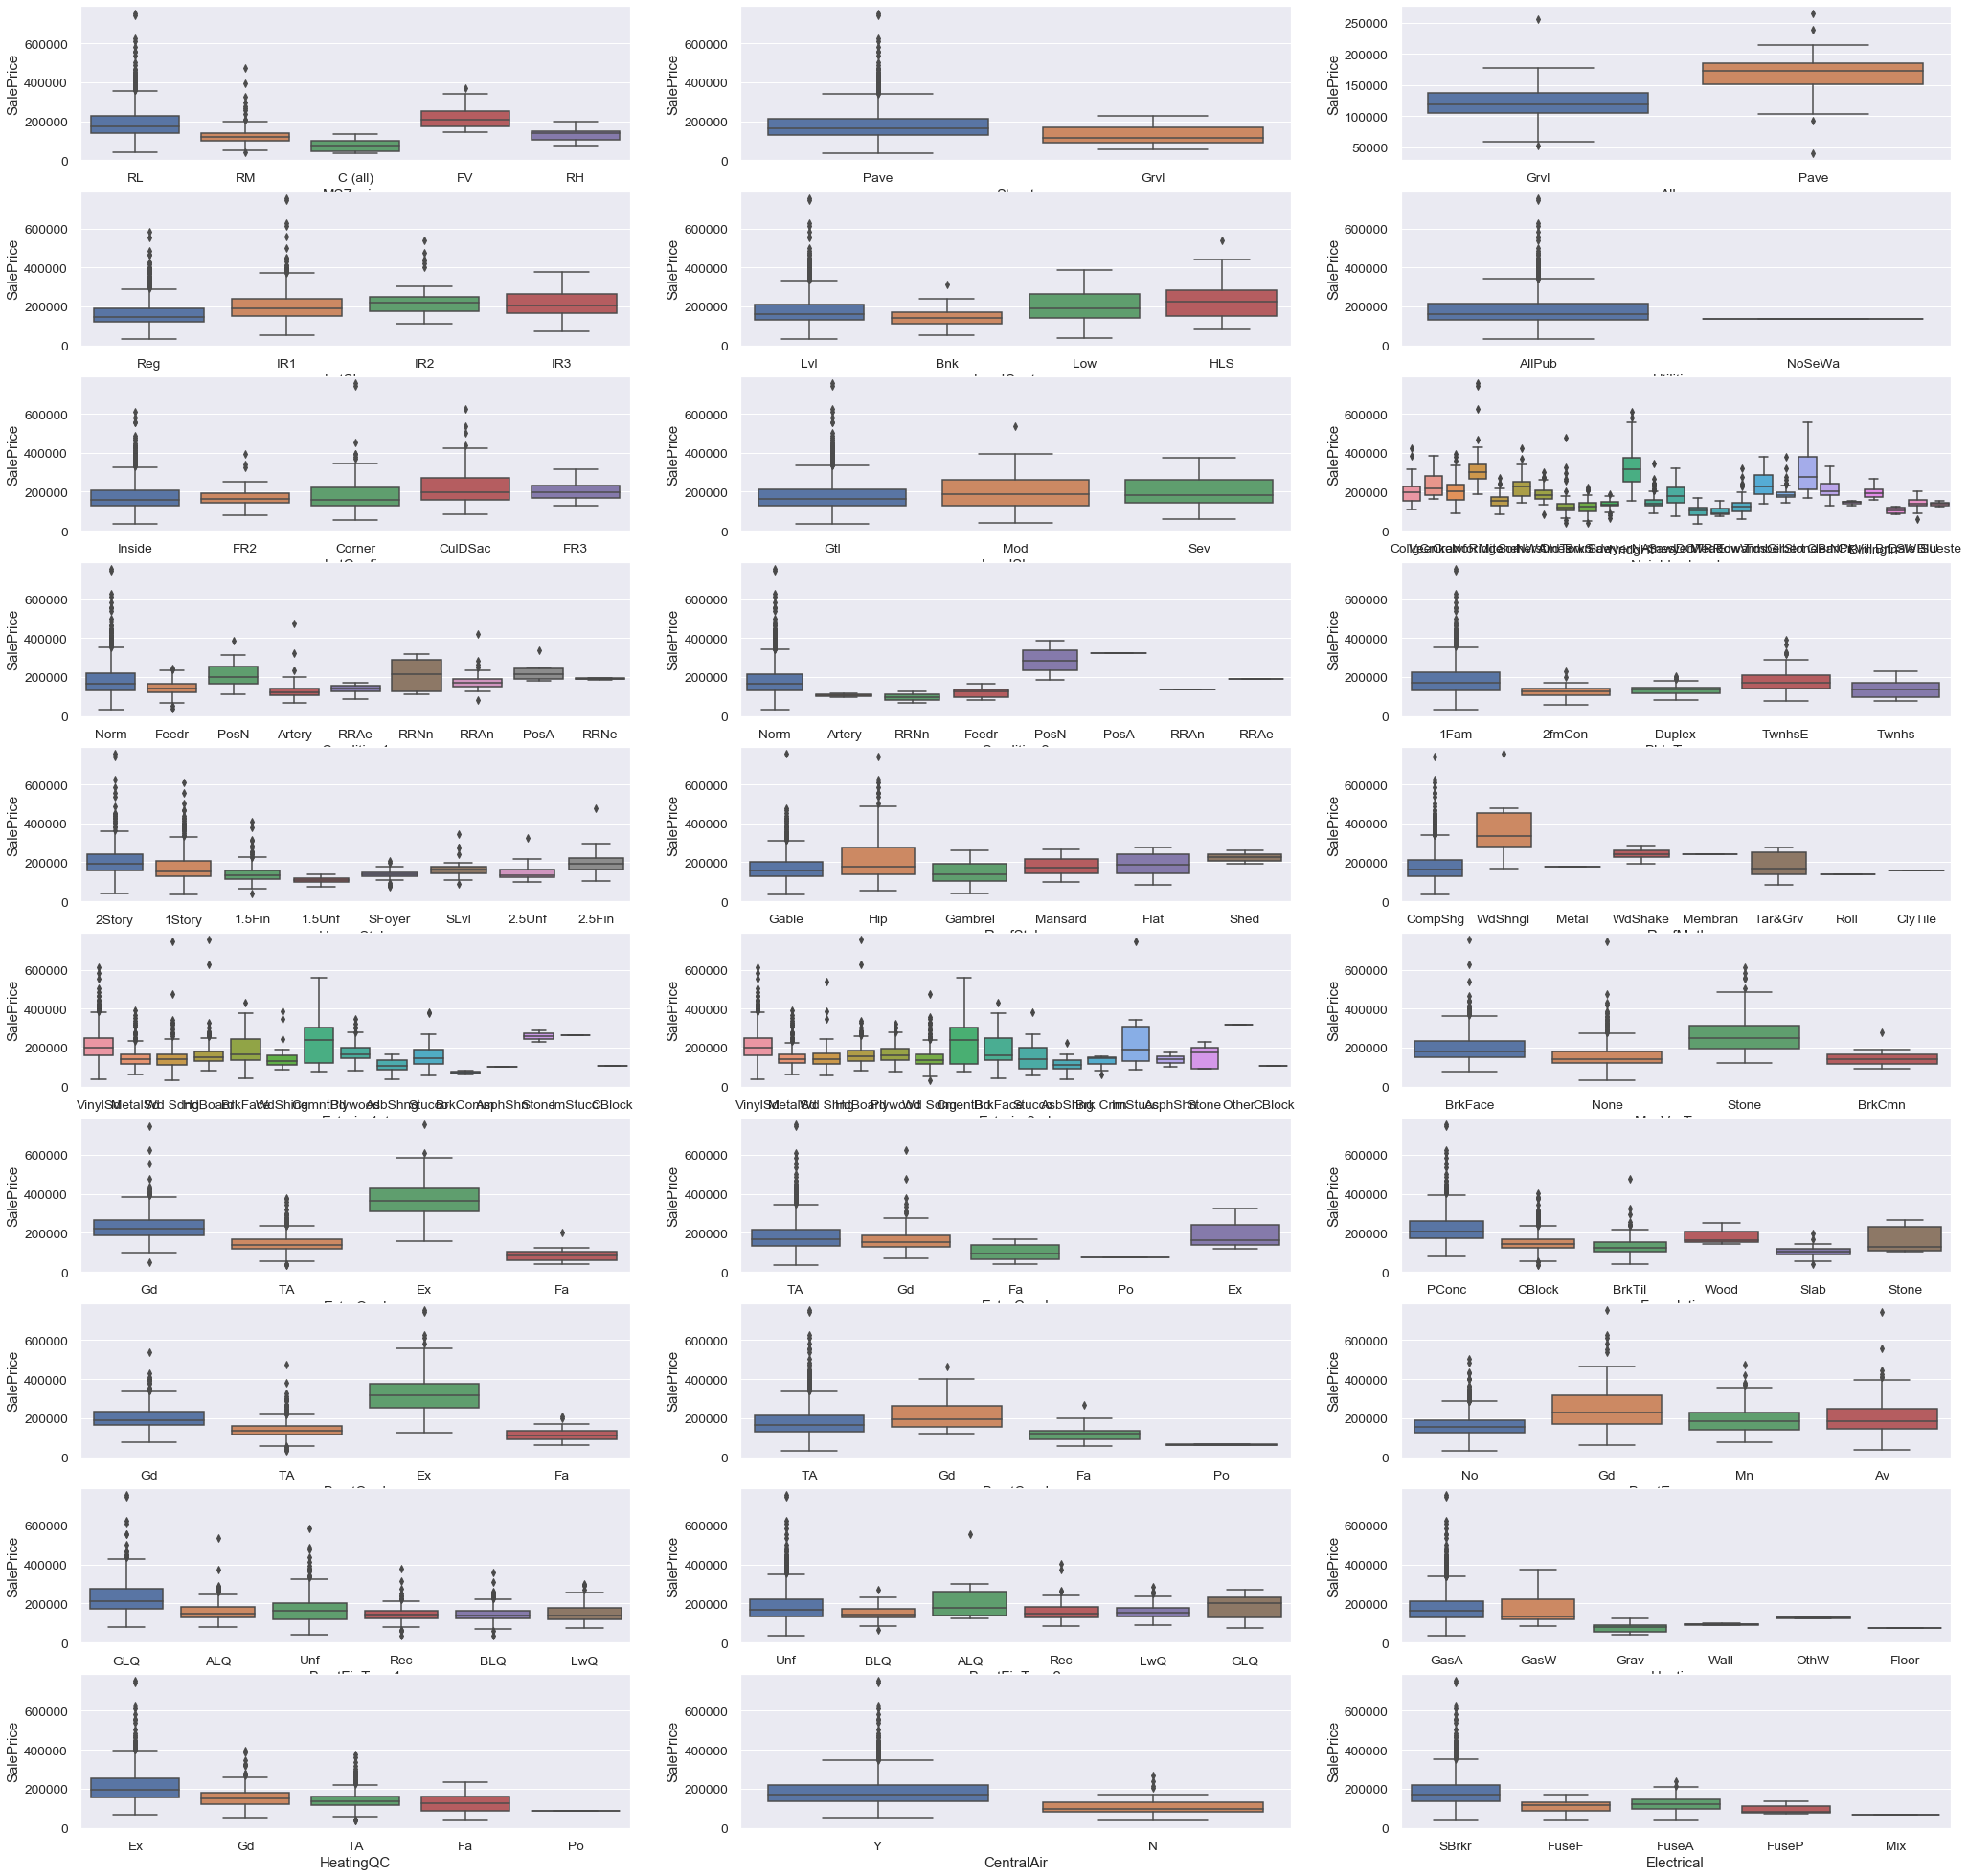

In [440]:
#checking the boxplot distributions

fig, ax = plt.subplots(10, 3, figsize=(35, 35))
for var, subplot in zip(categorical_features_train_df, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=train, ax=subplot)

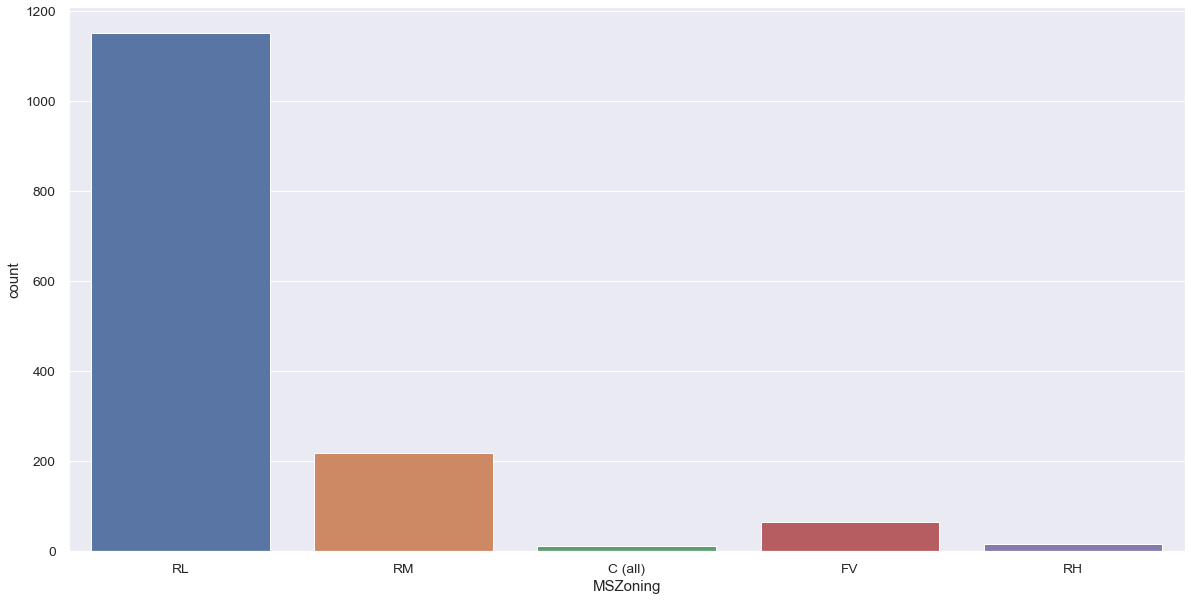

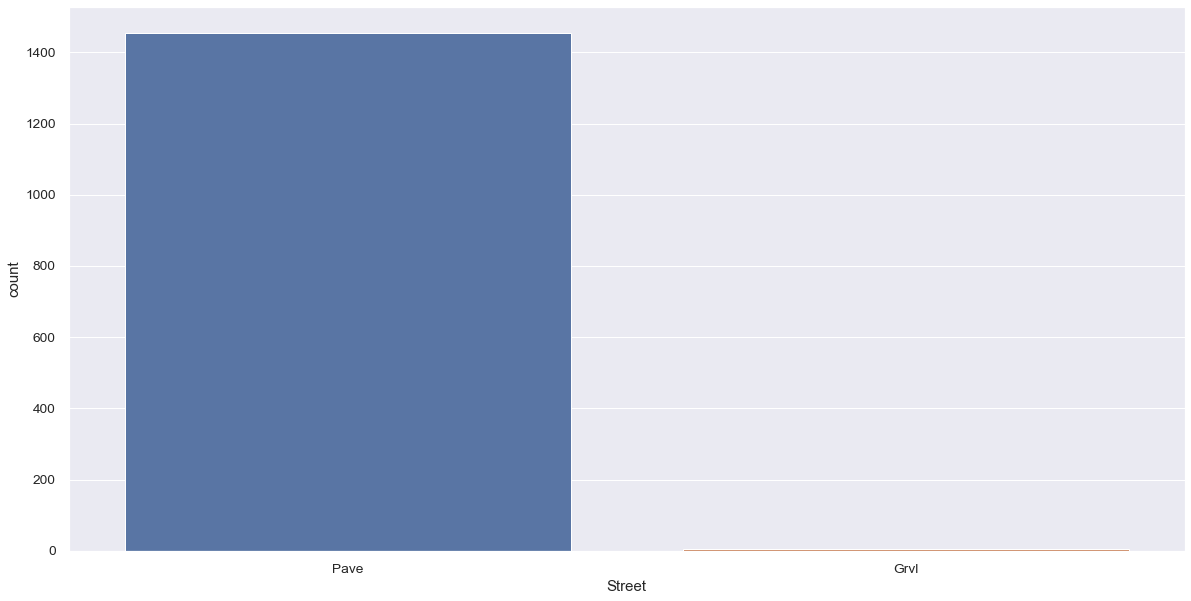

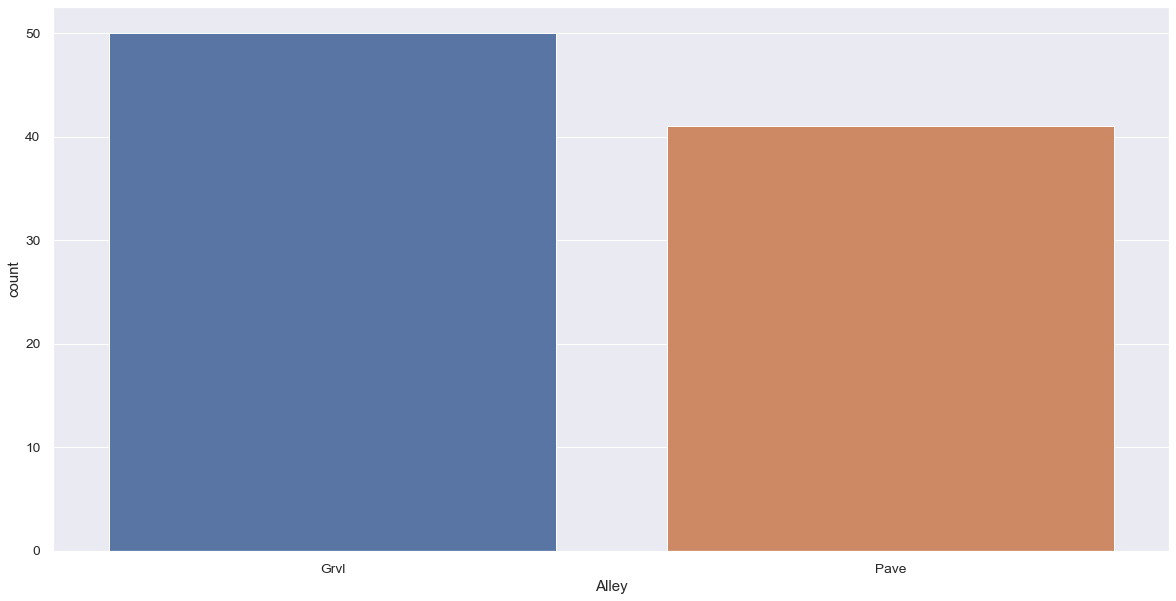

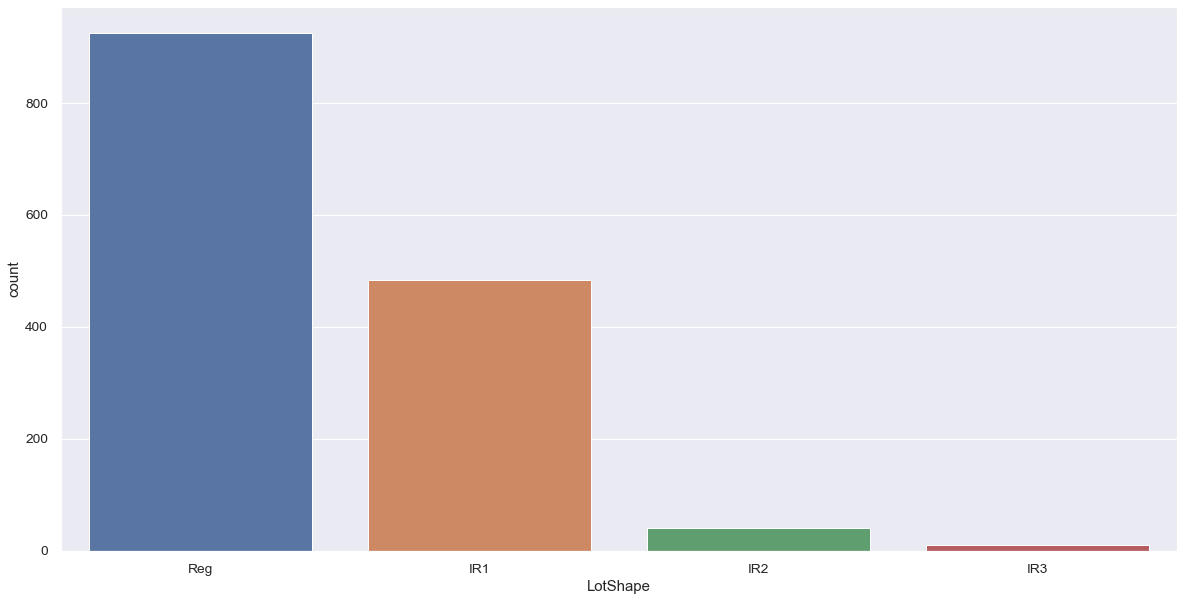

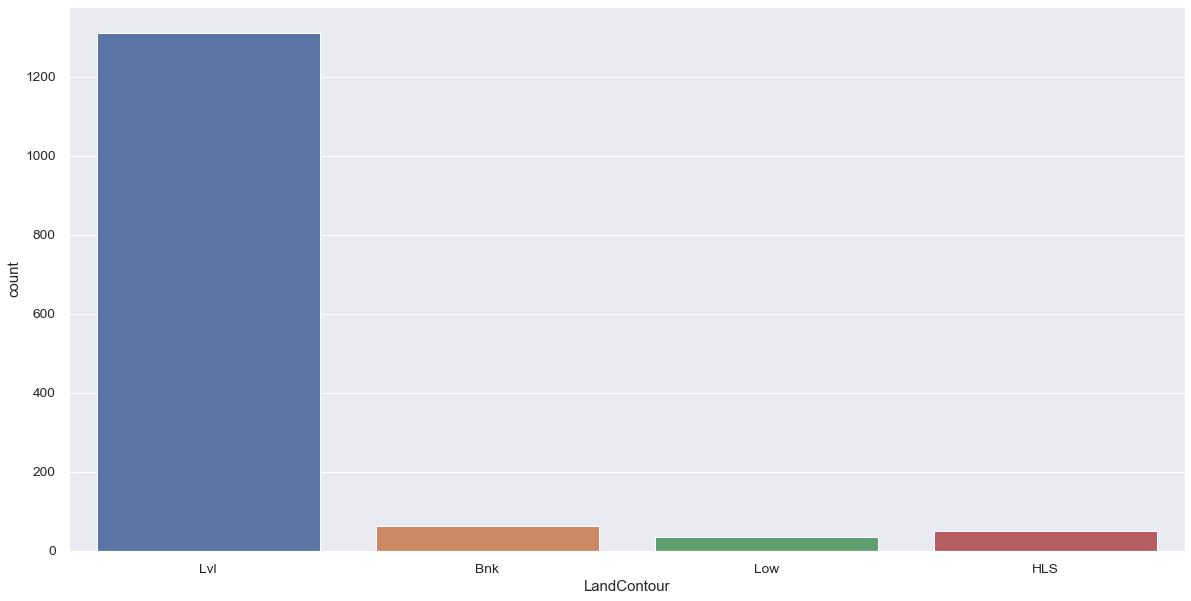

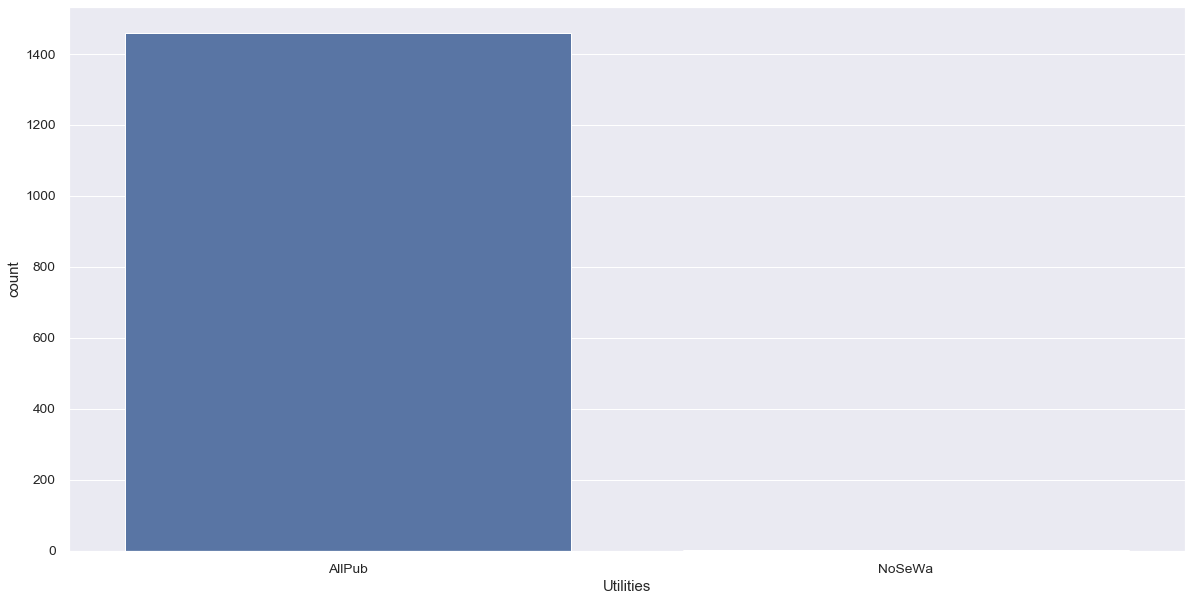

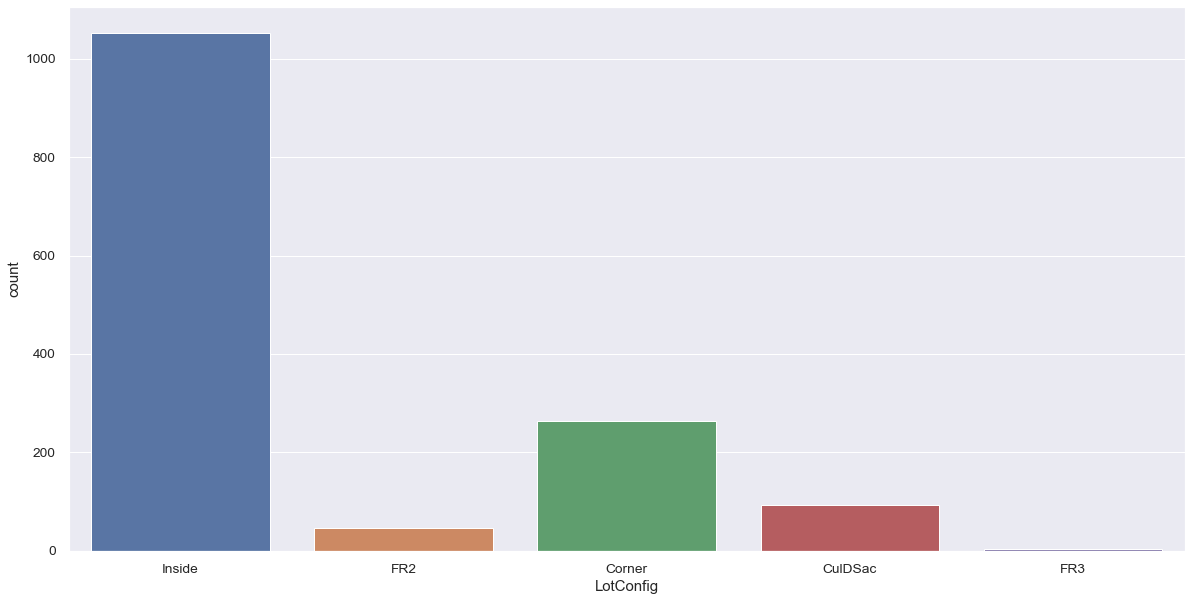

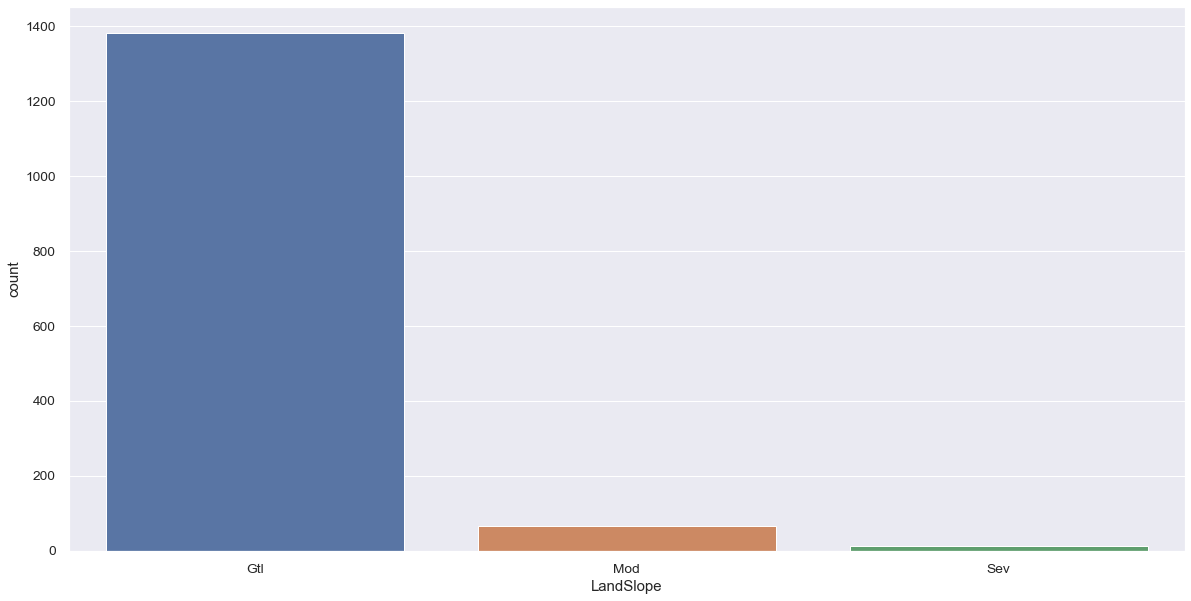

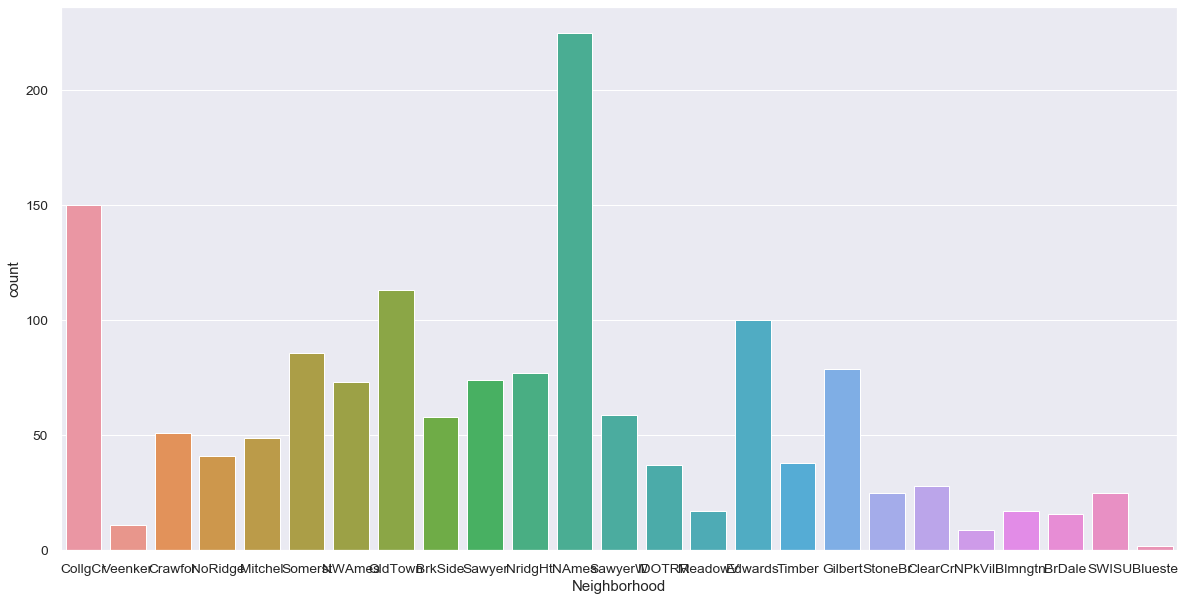

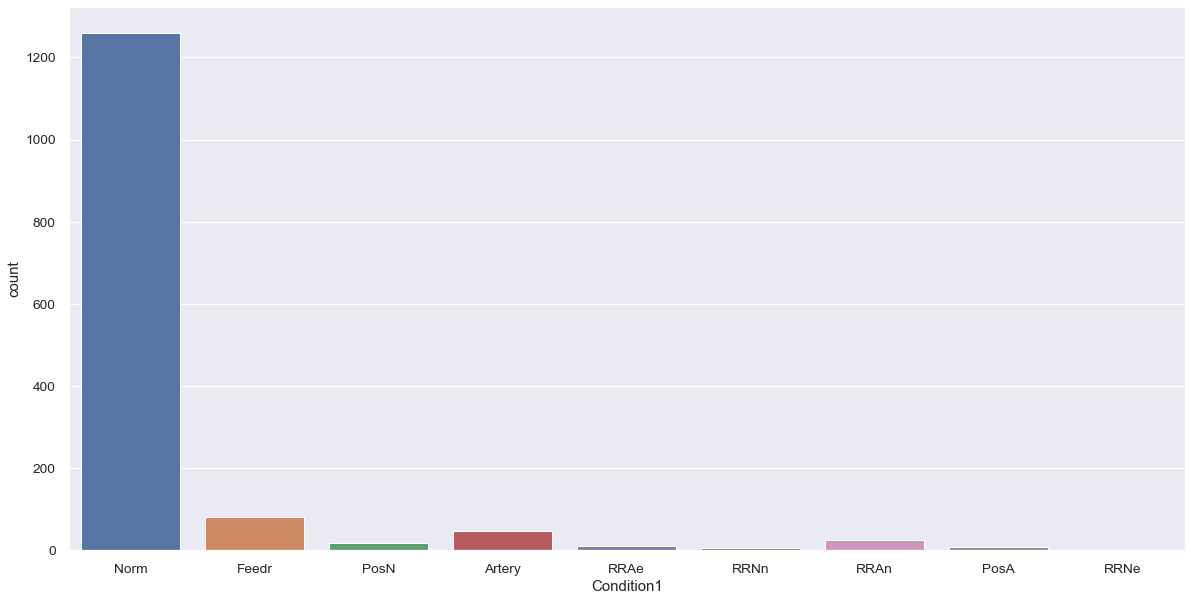

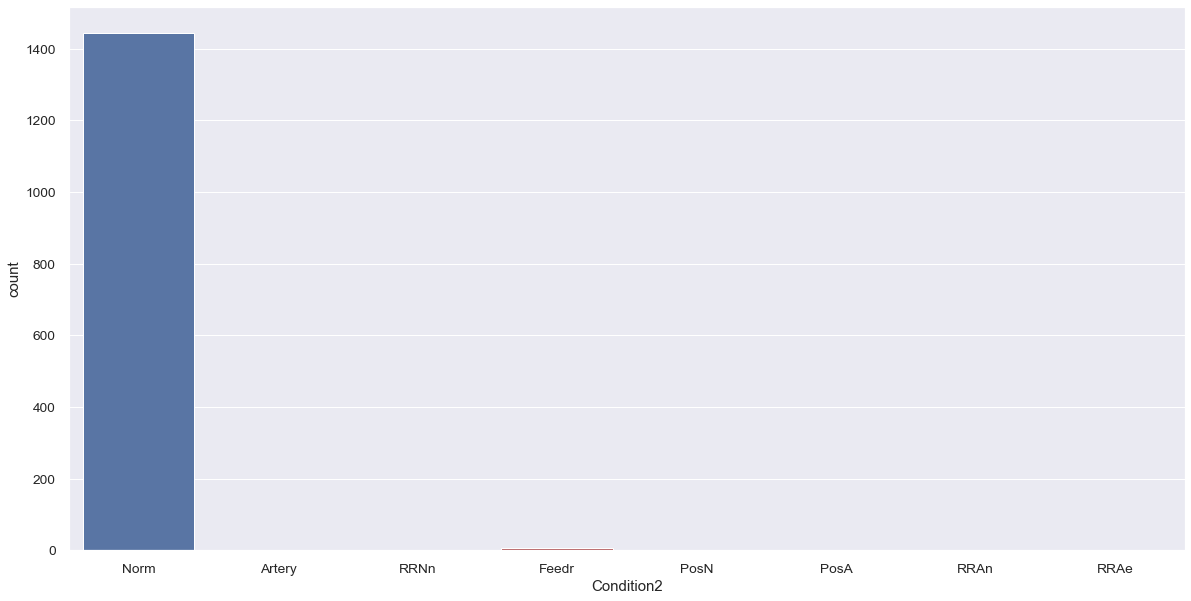

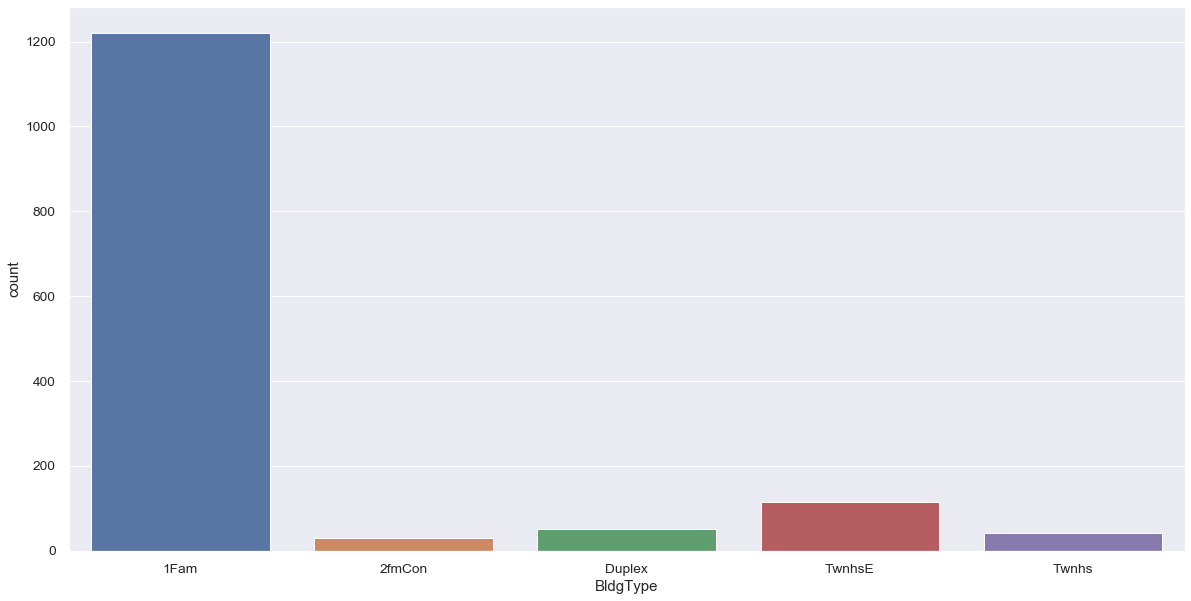

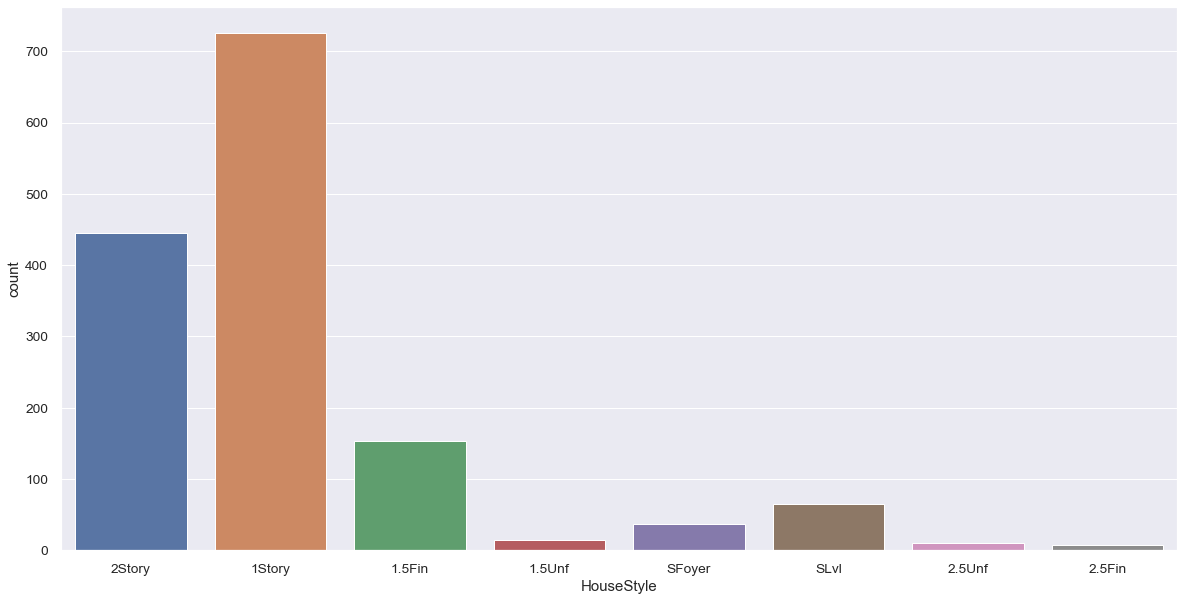

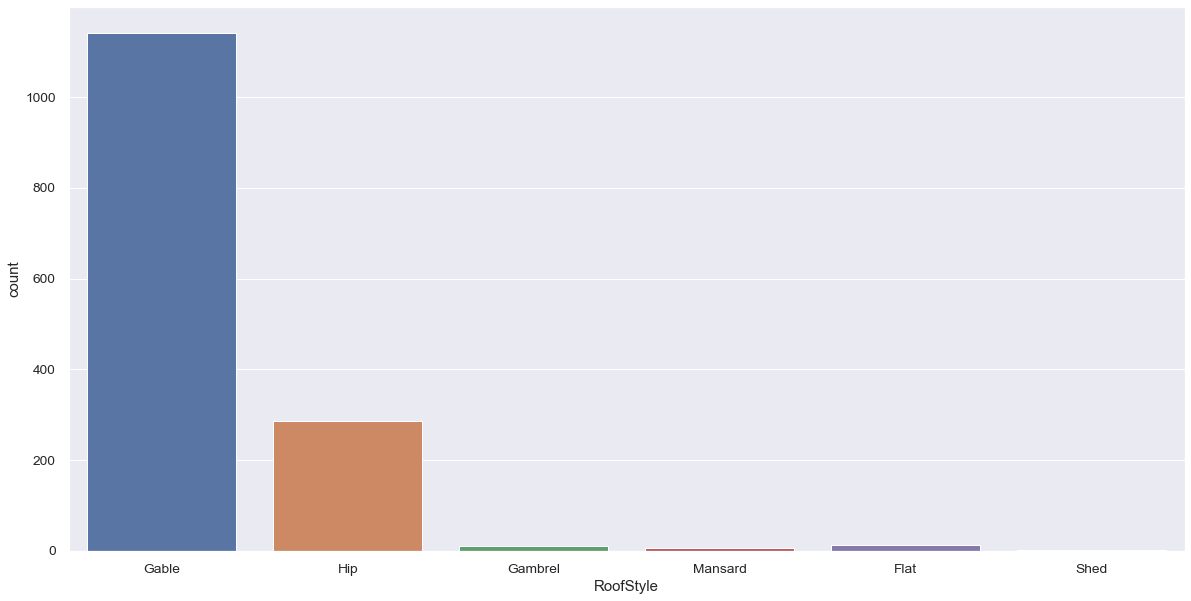

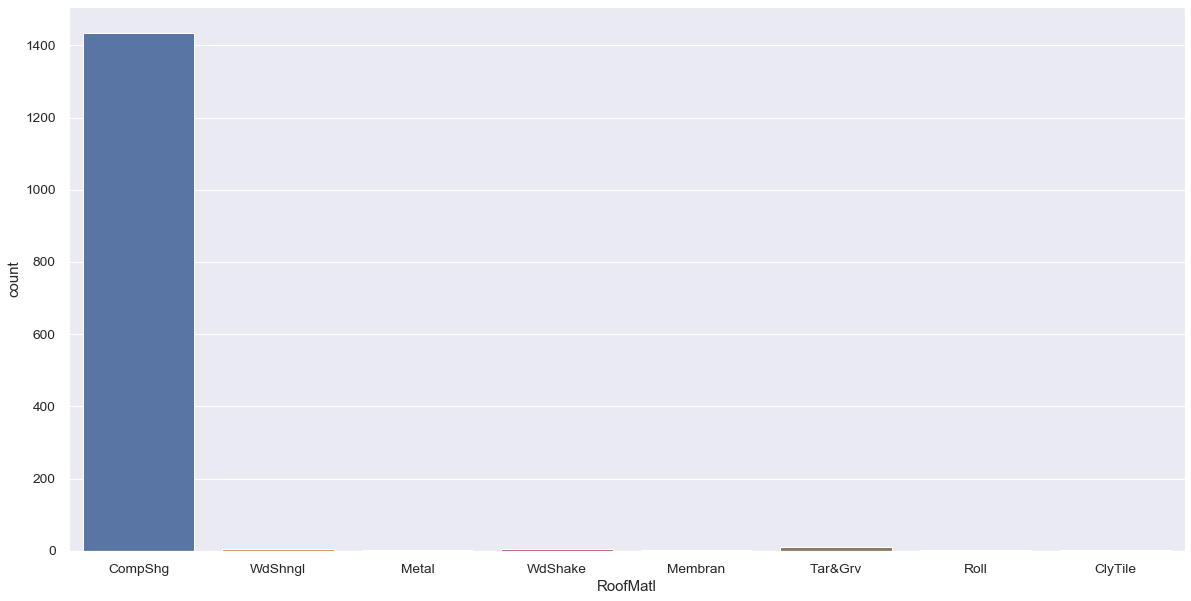

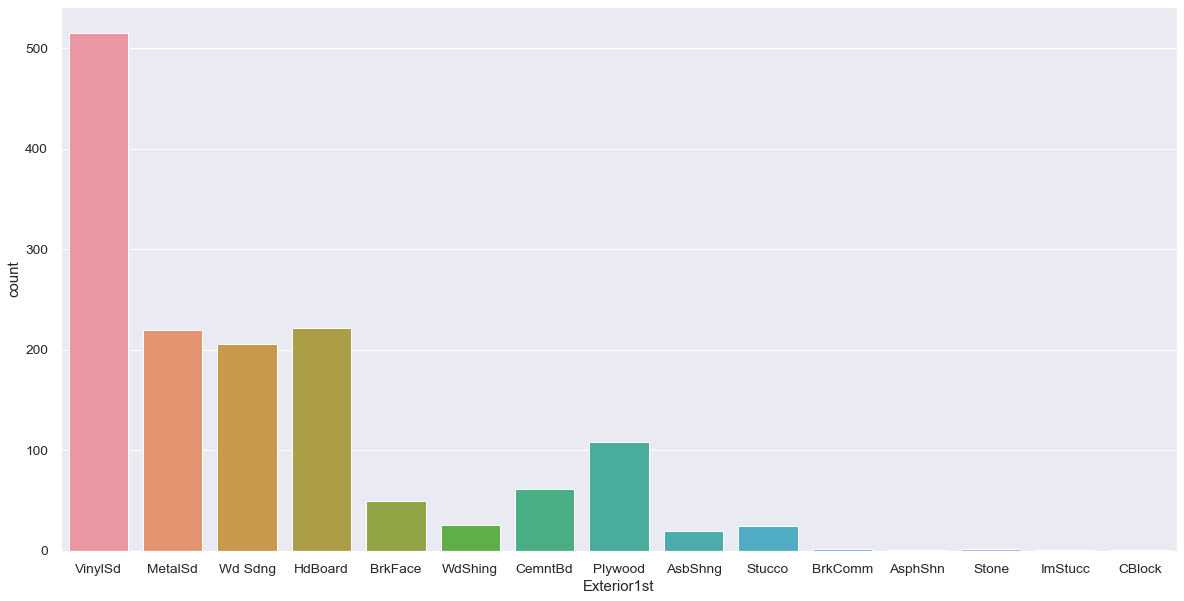

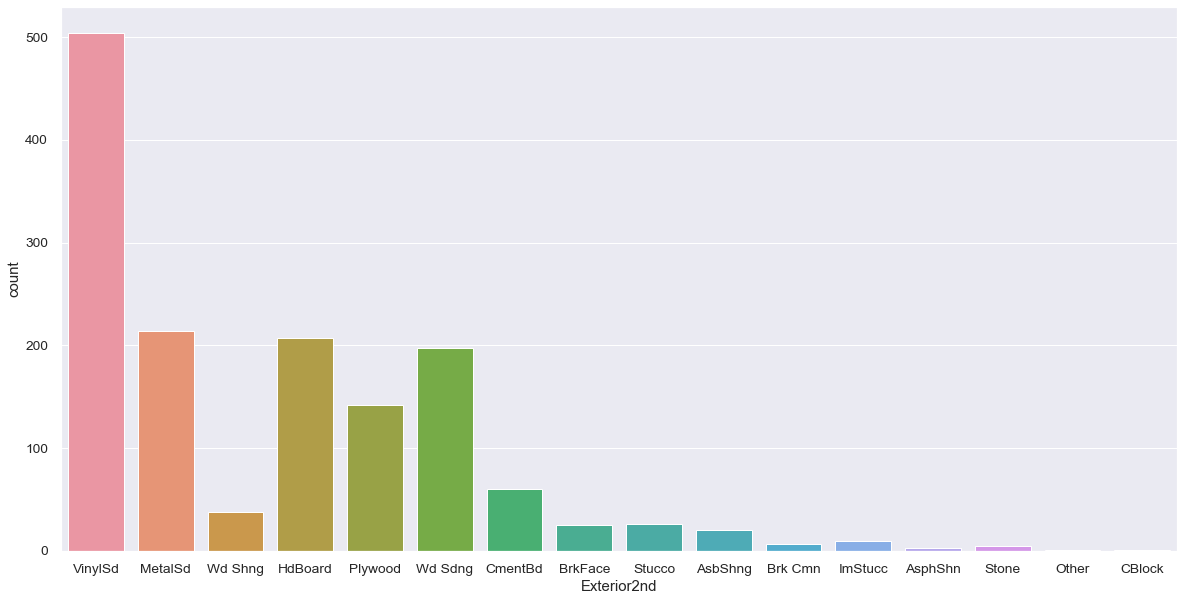

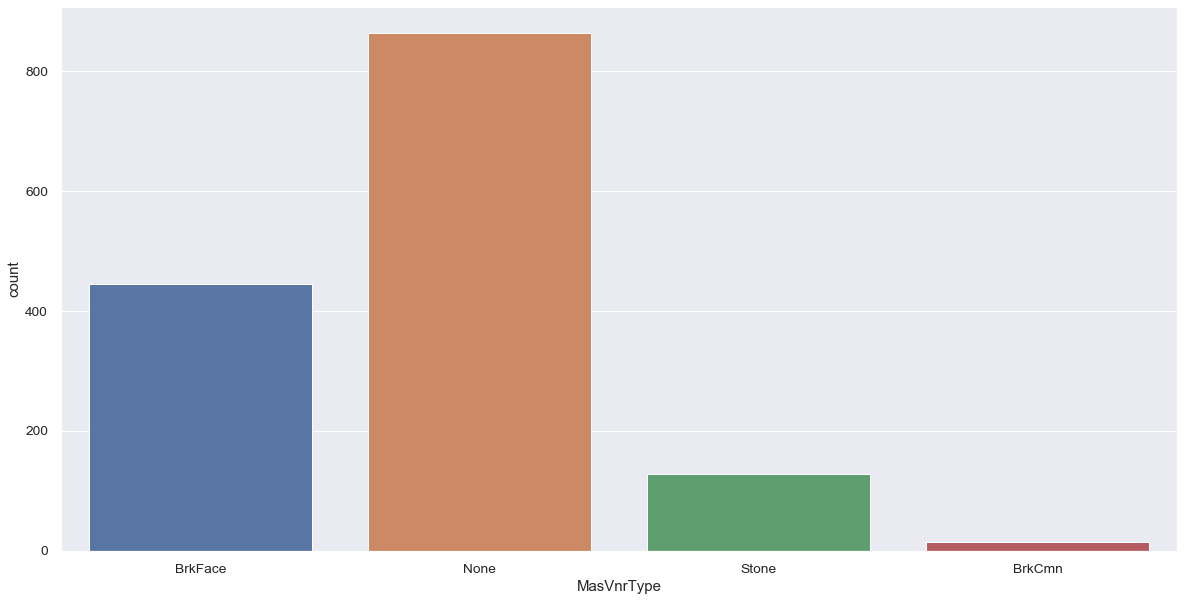

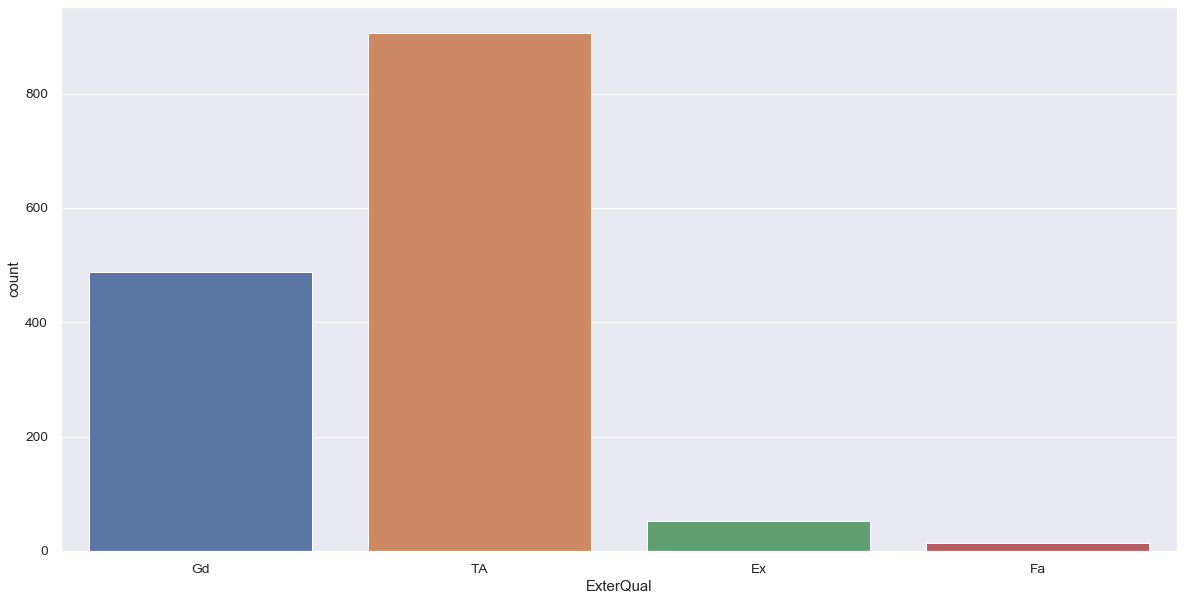

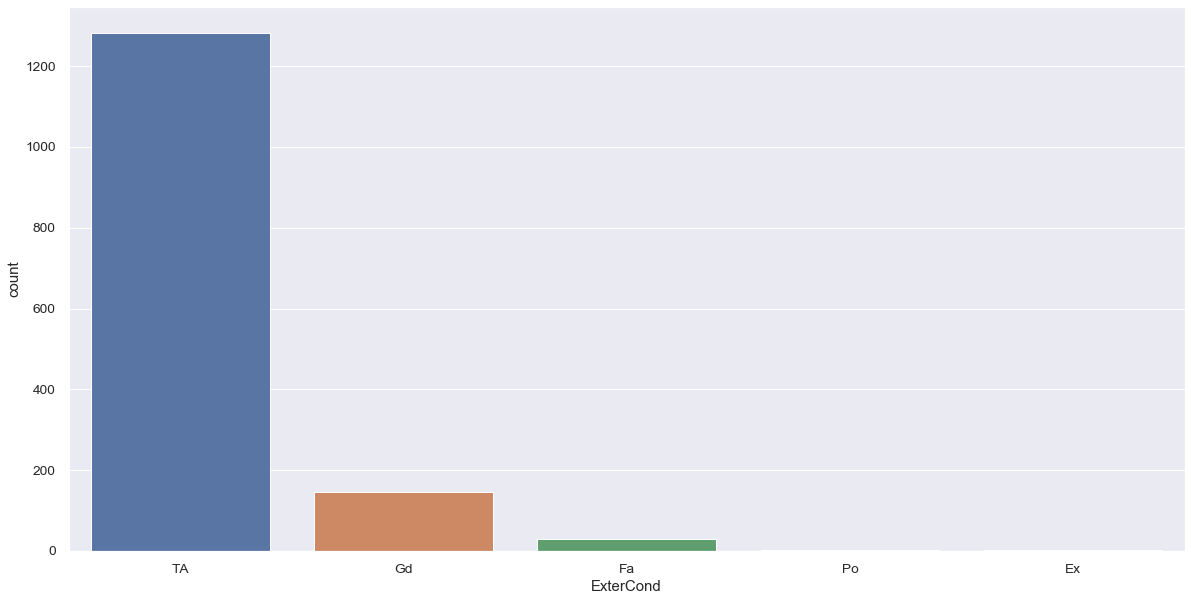

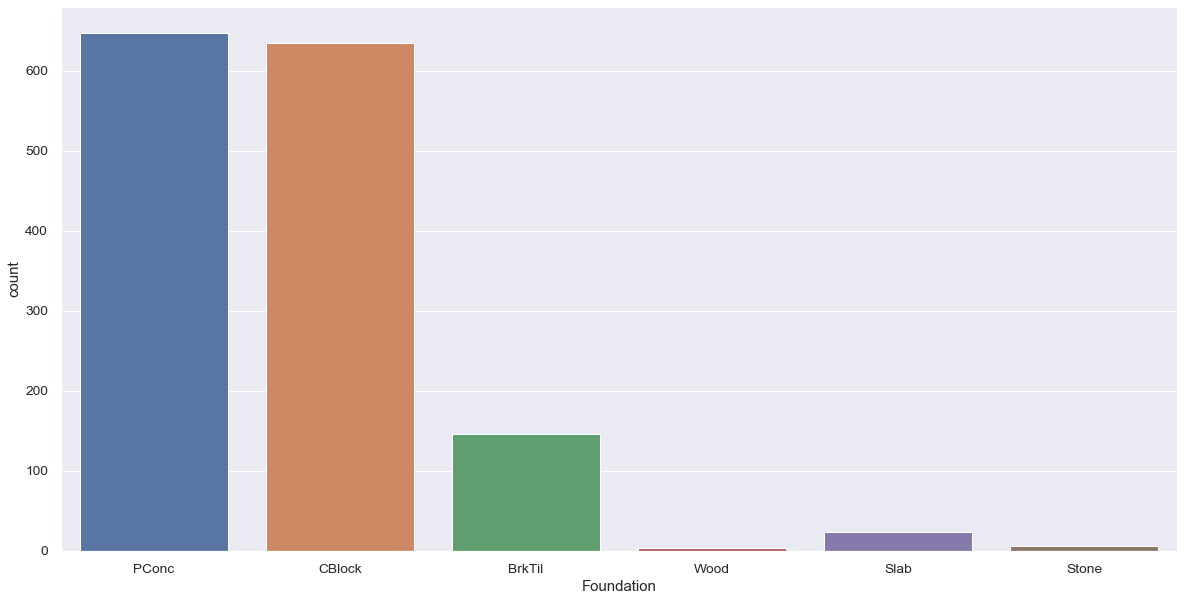

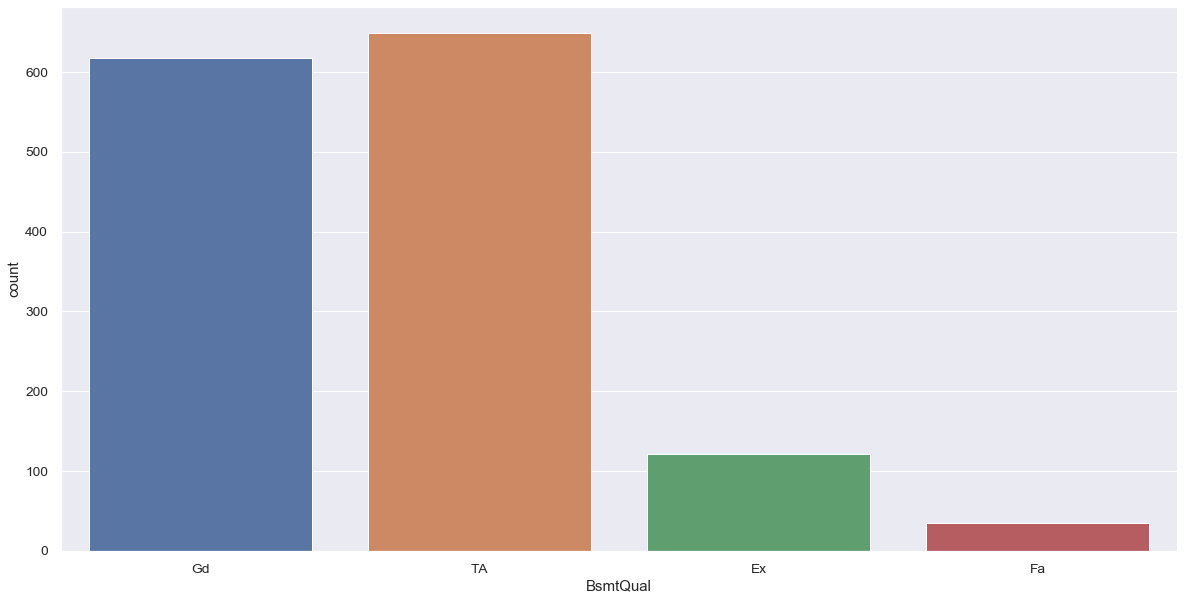

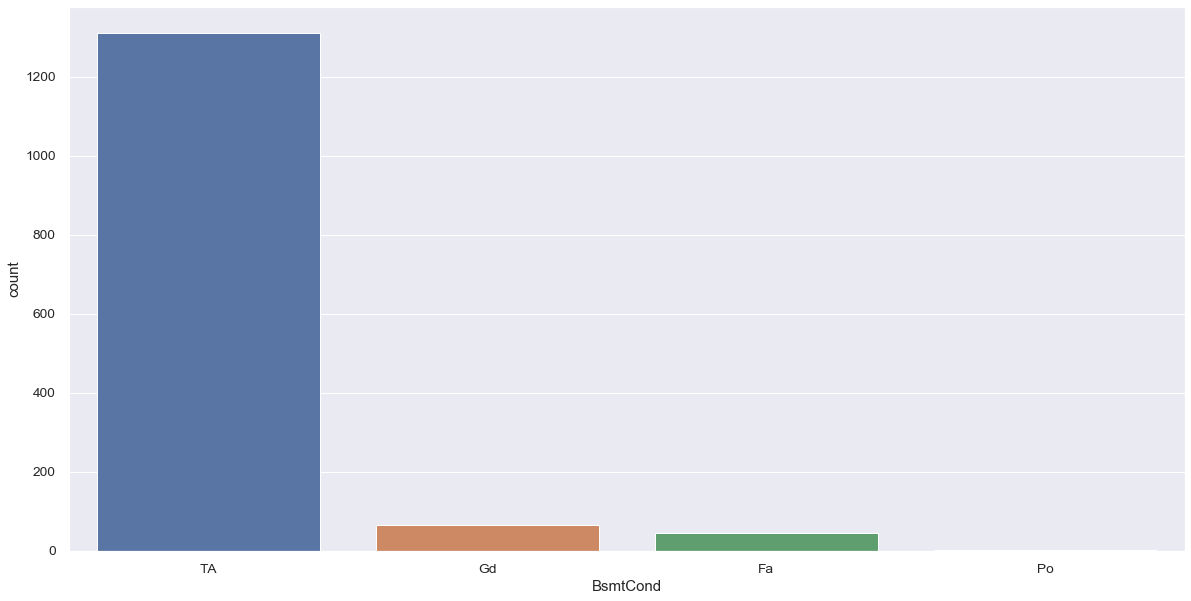

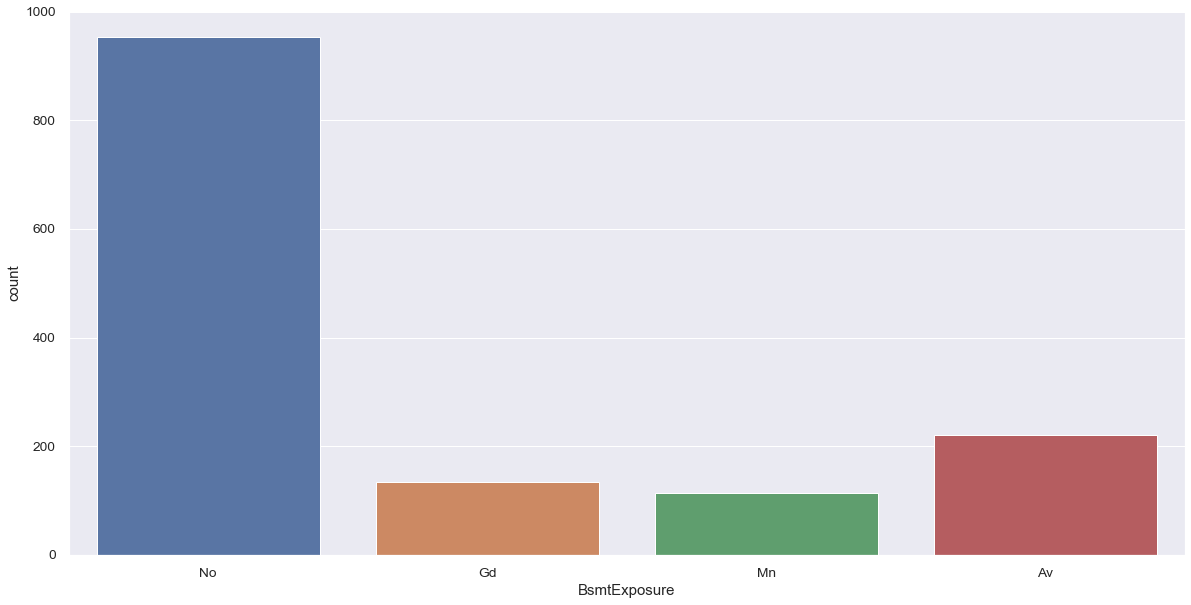

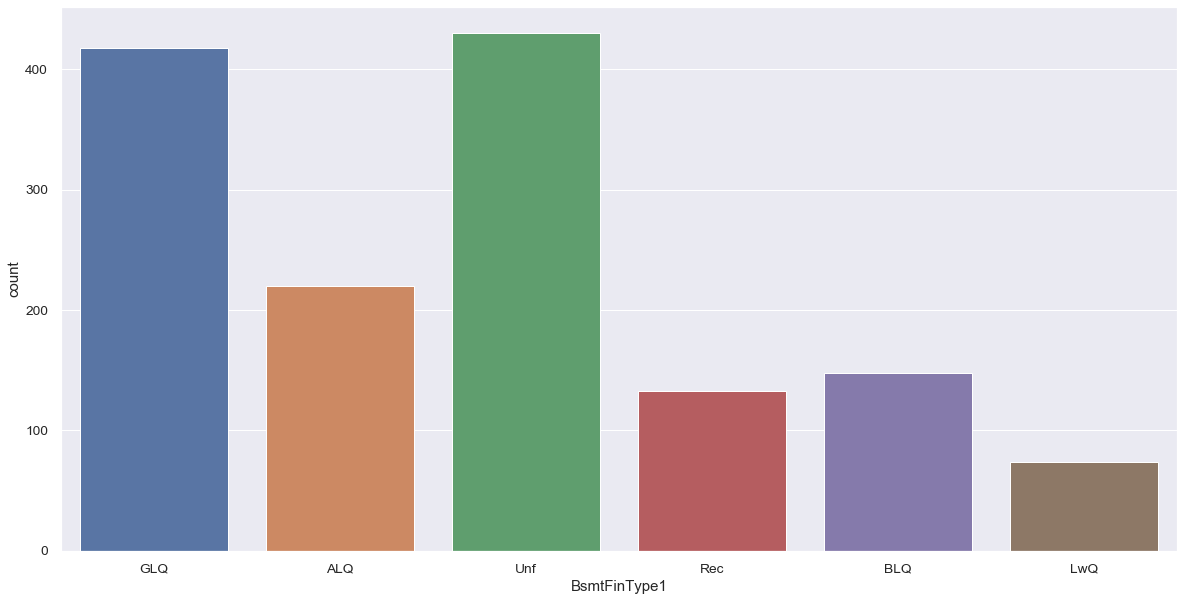

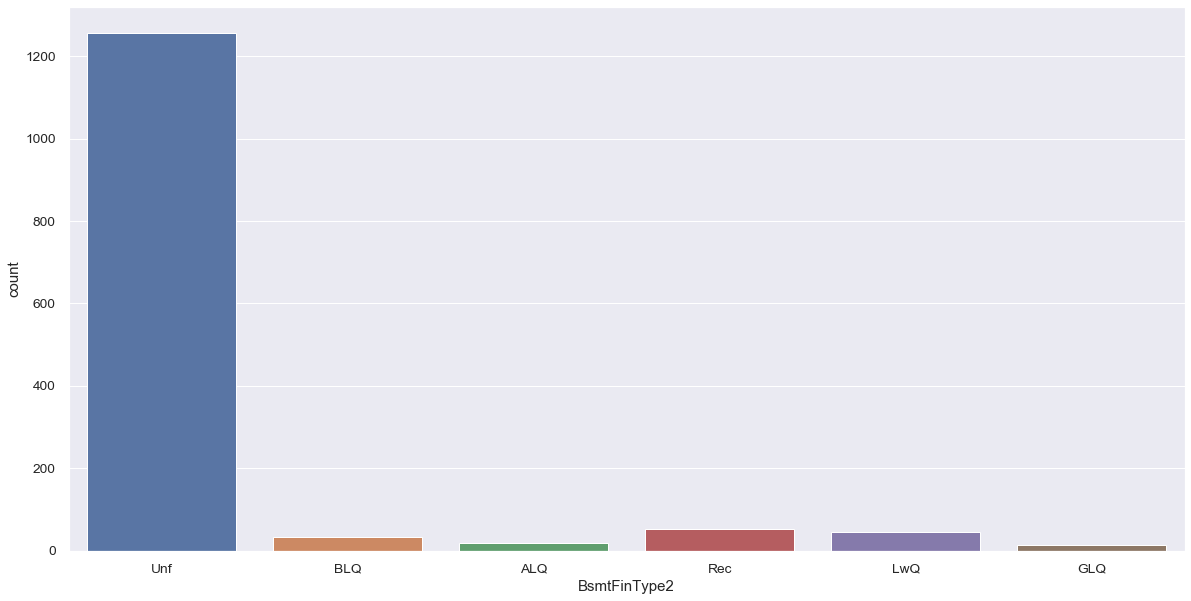

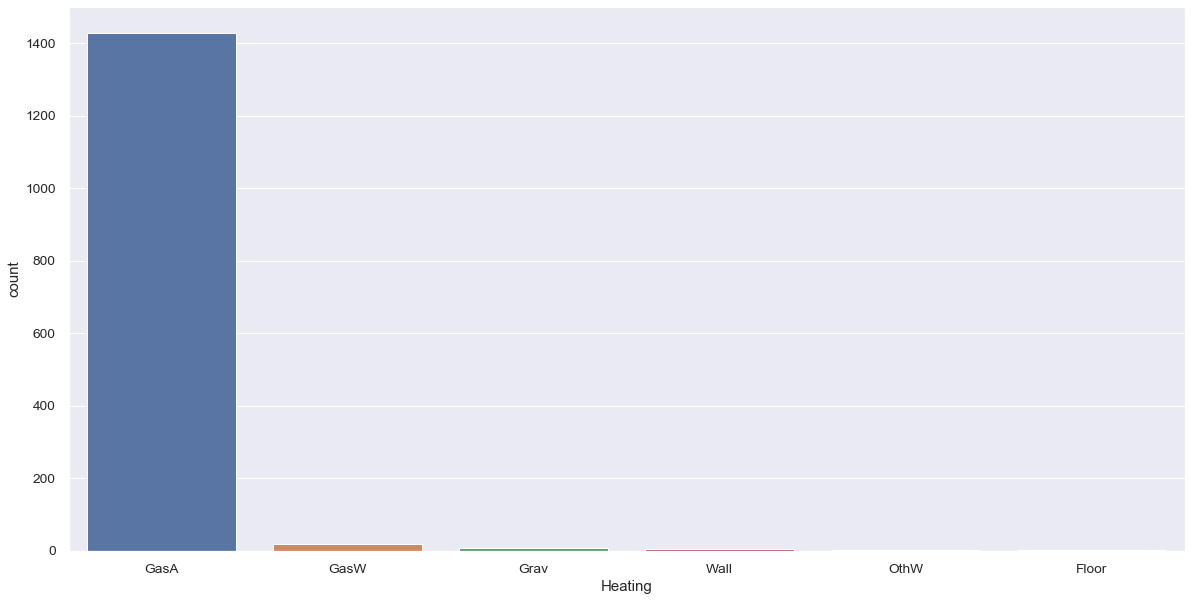

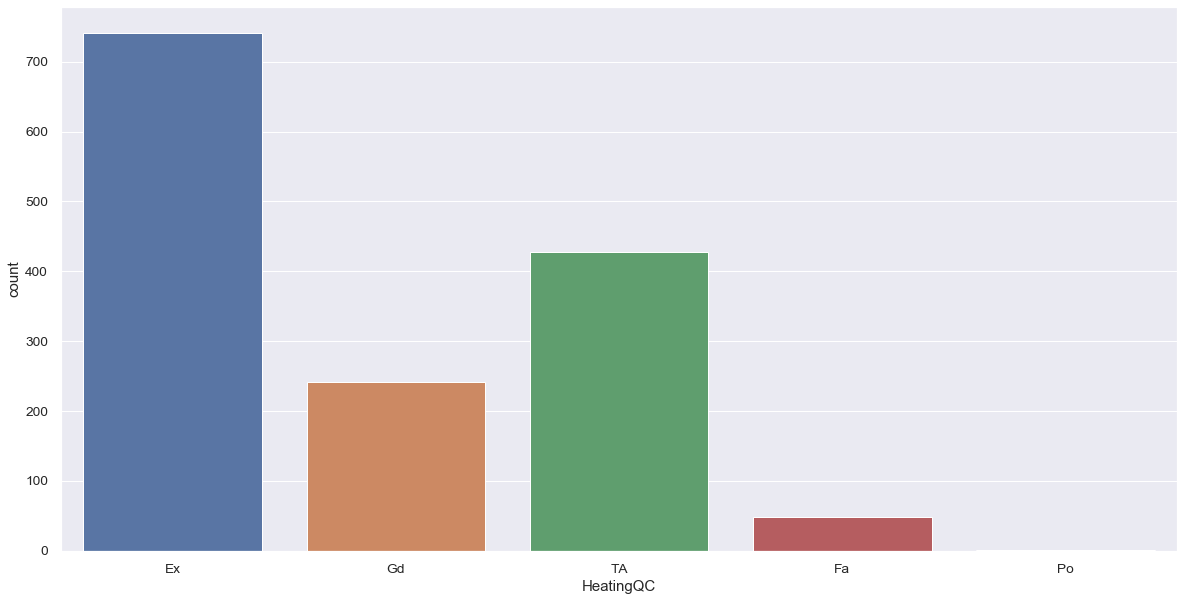

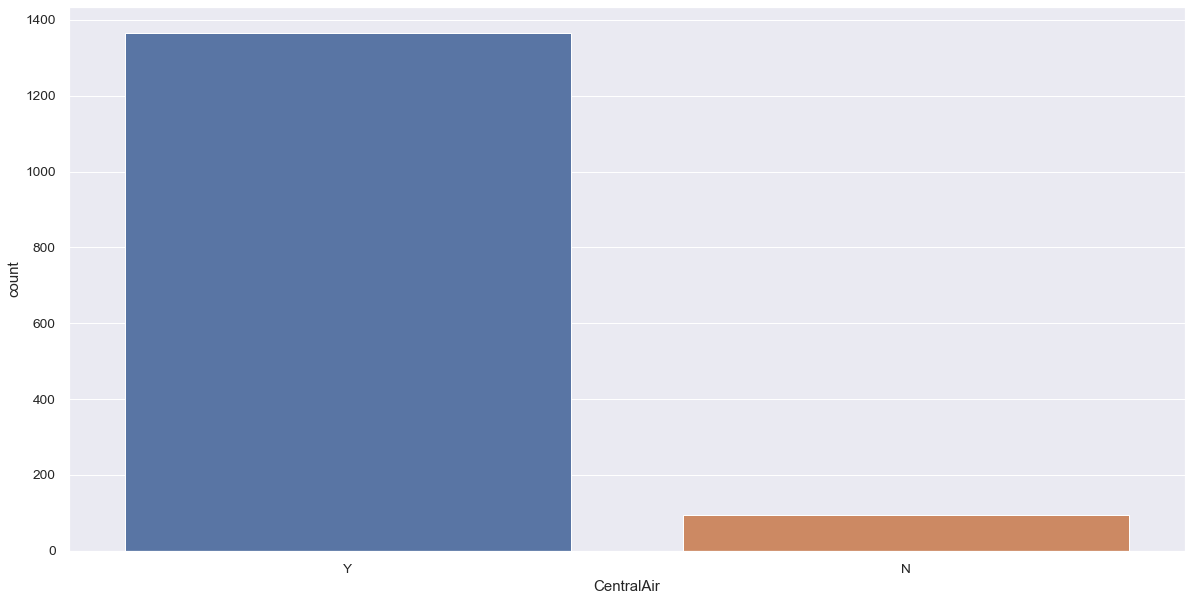

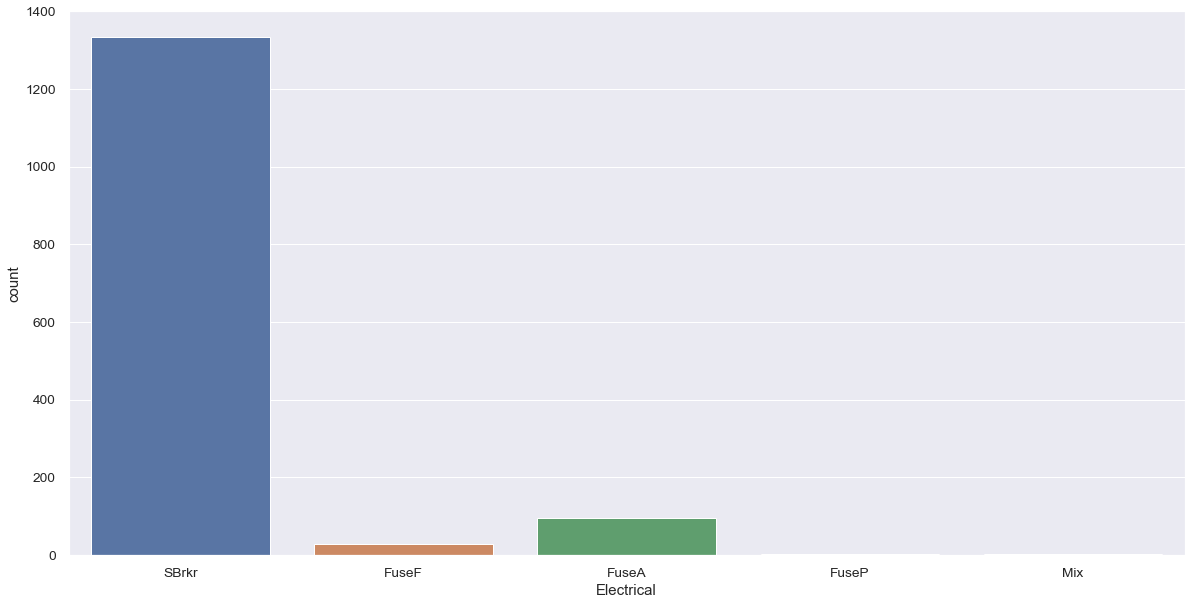

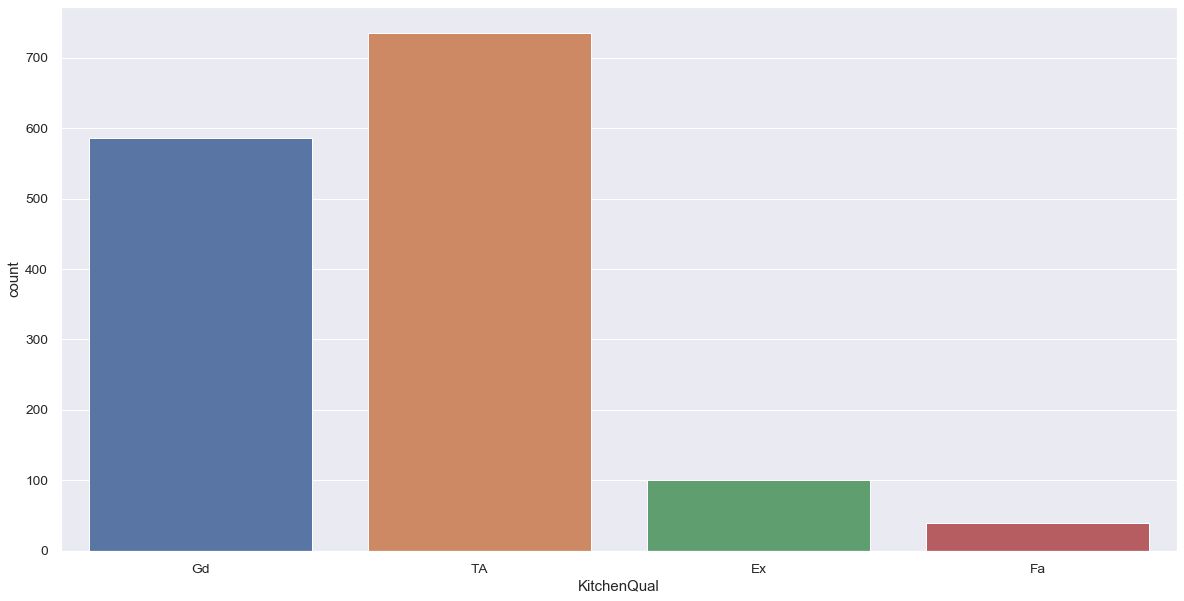

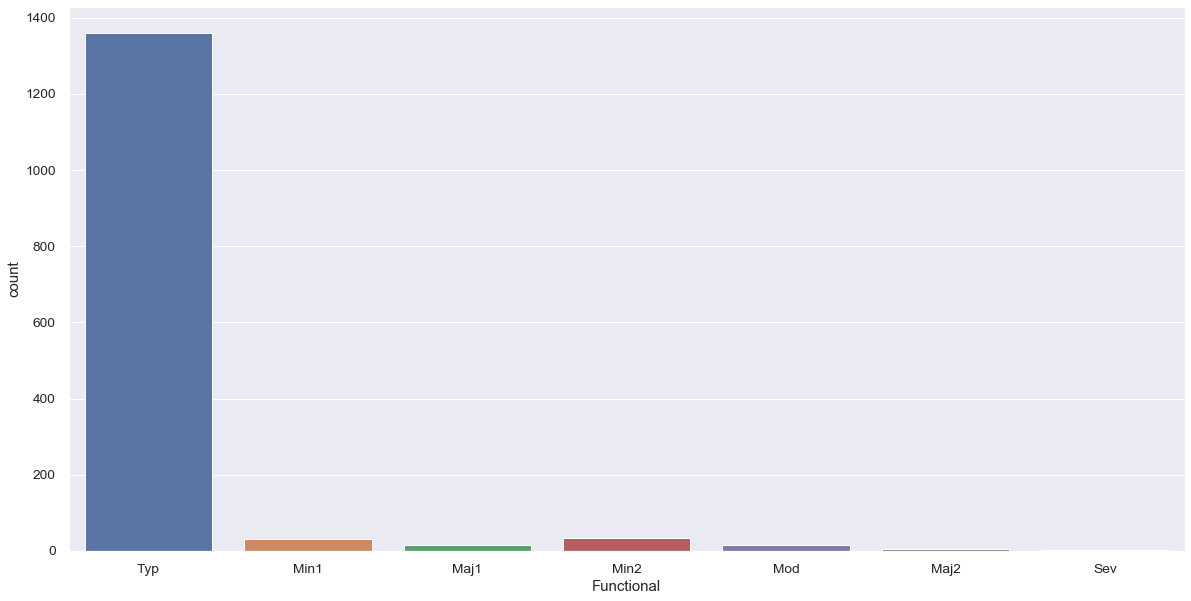

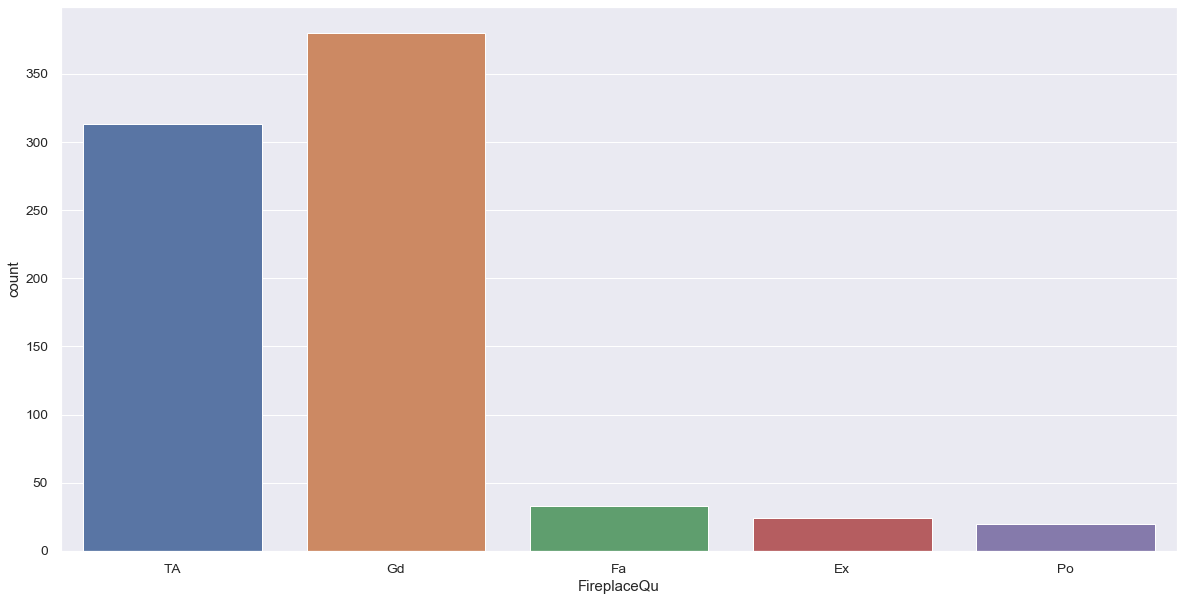

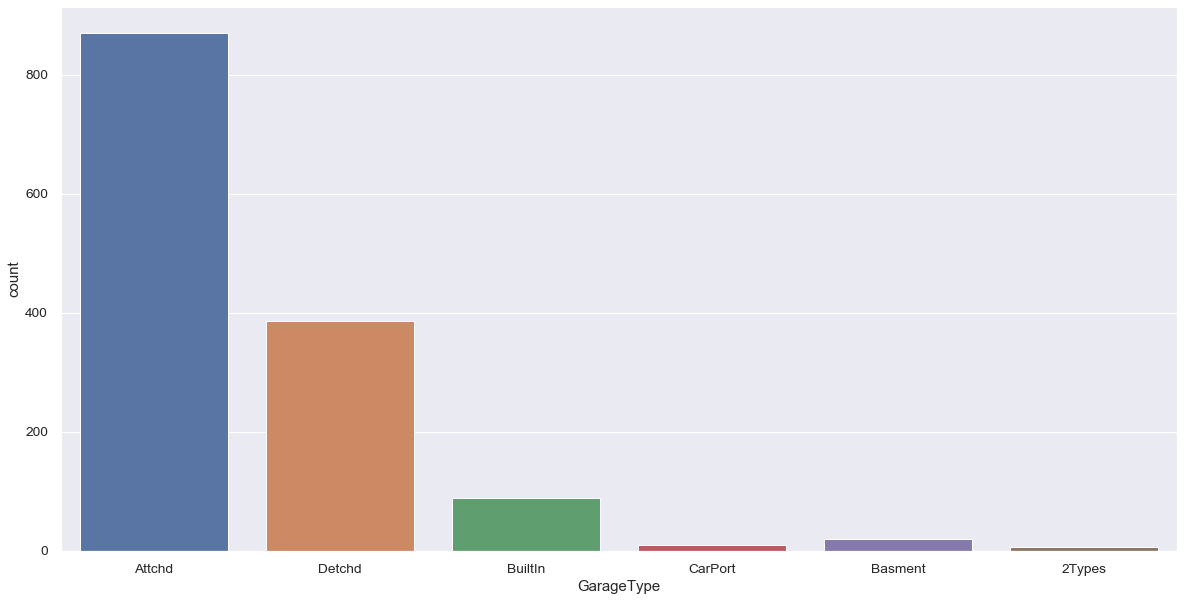

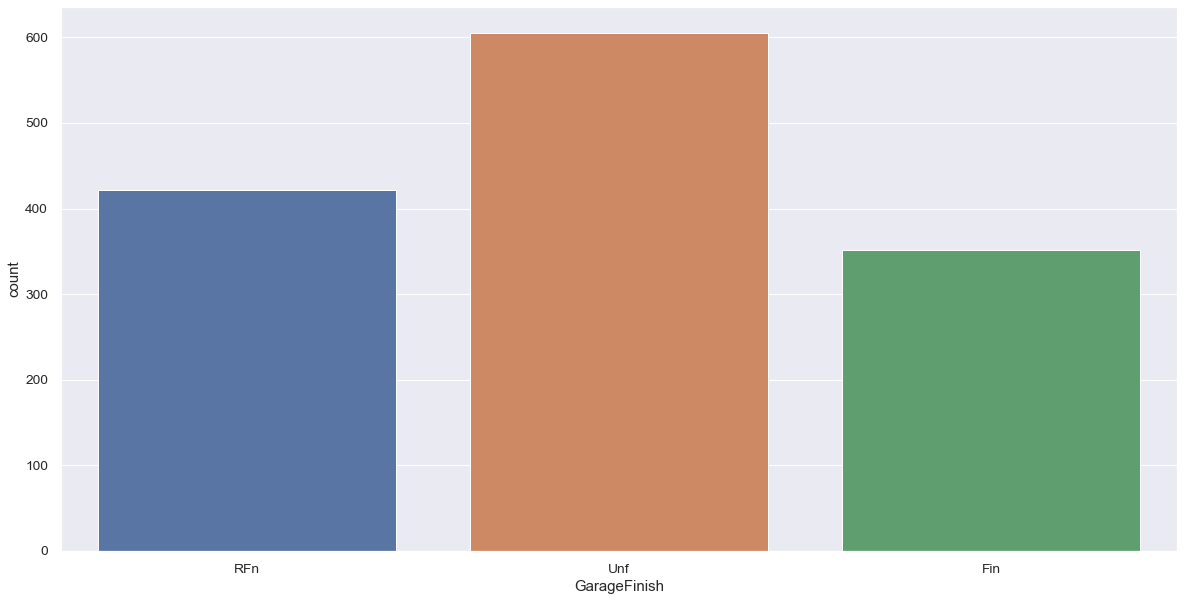

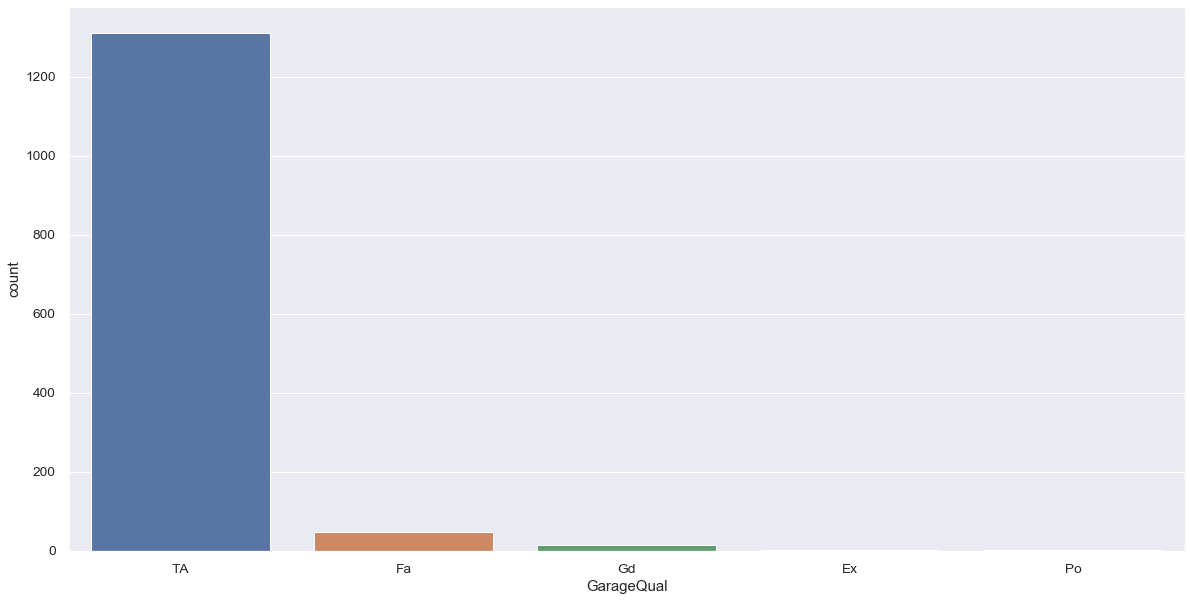

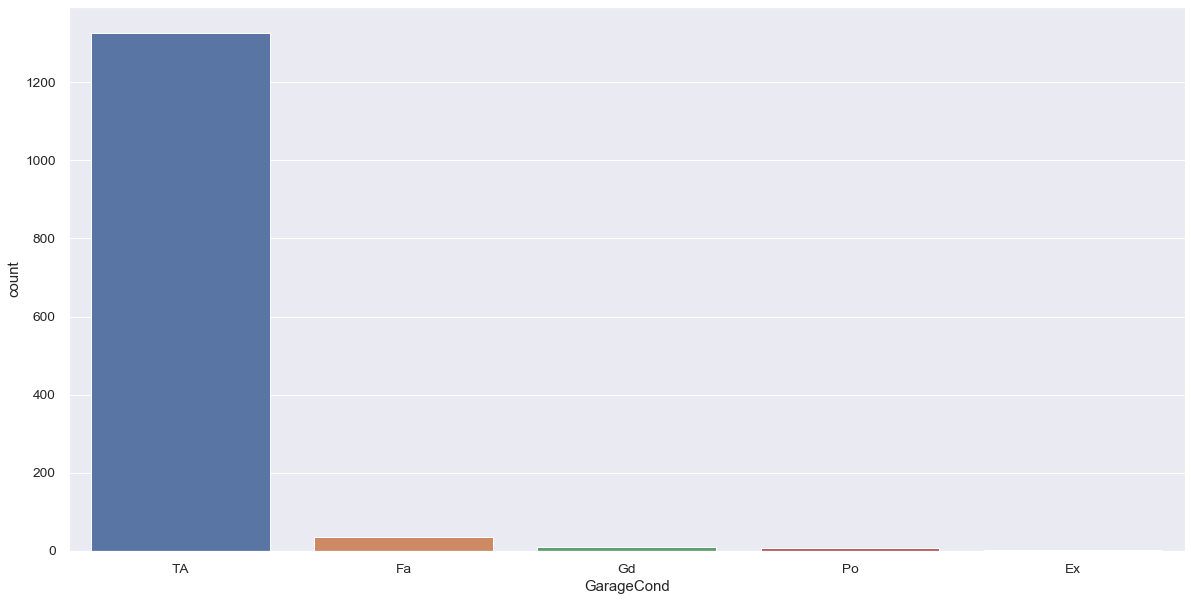

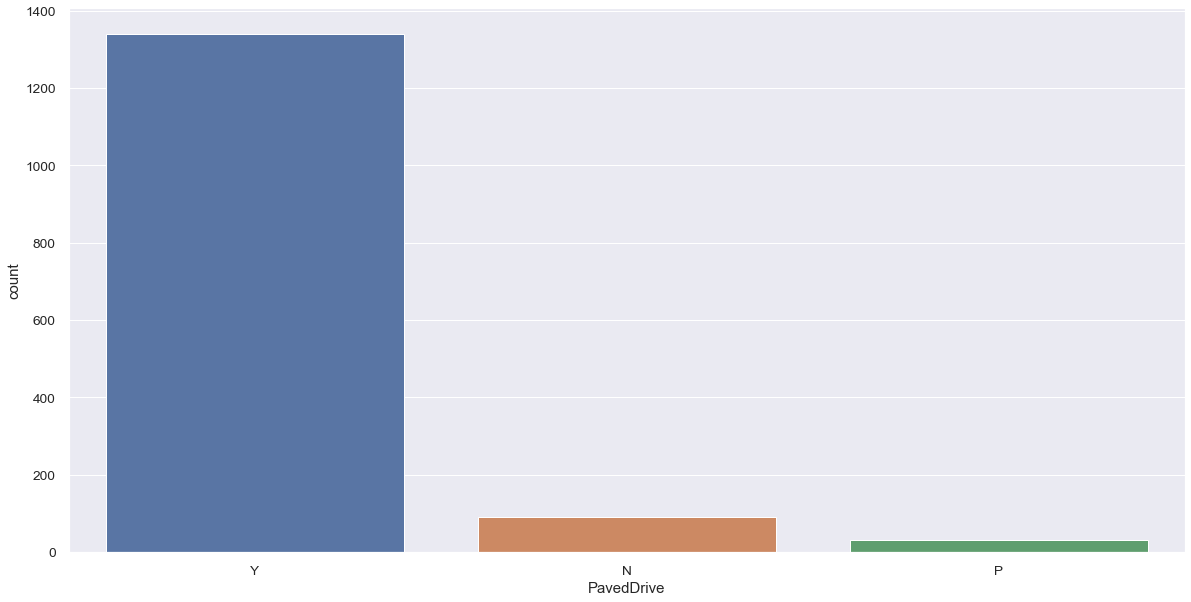

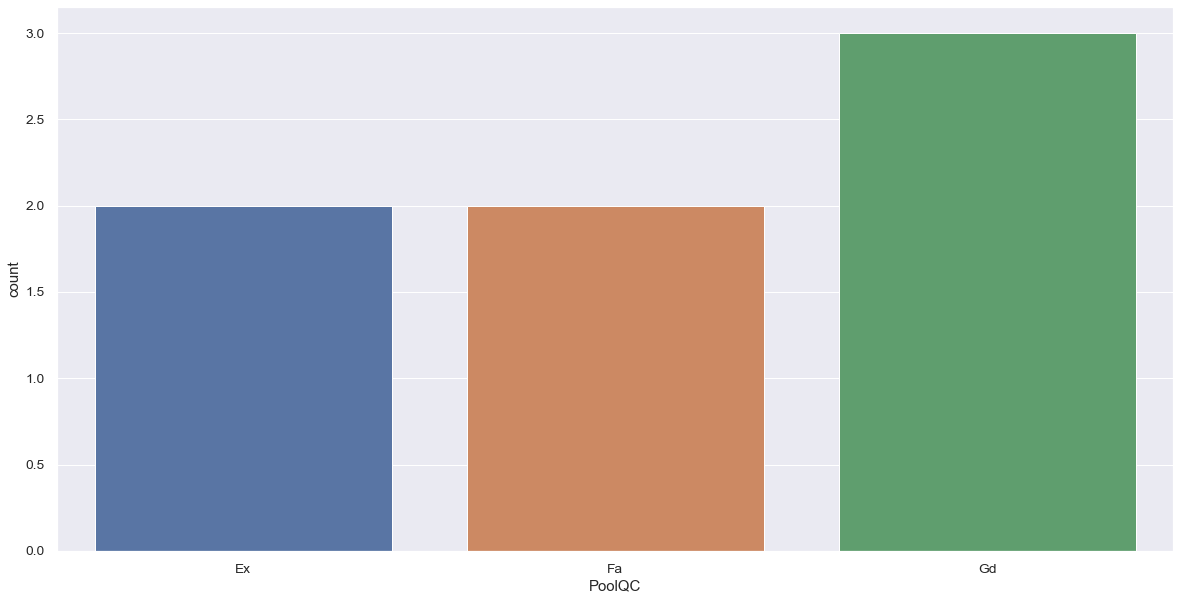

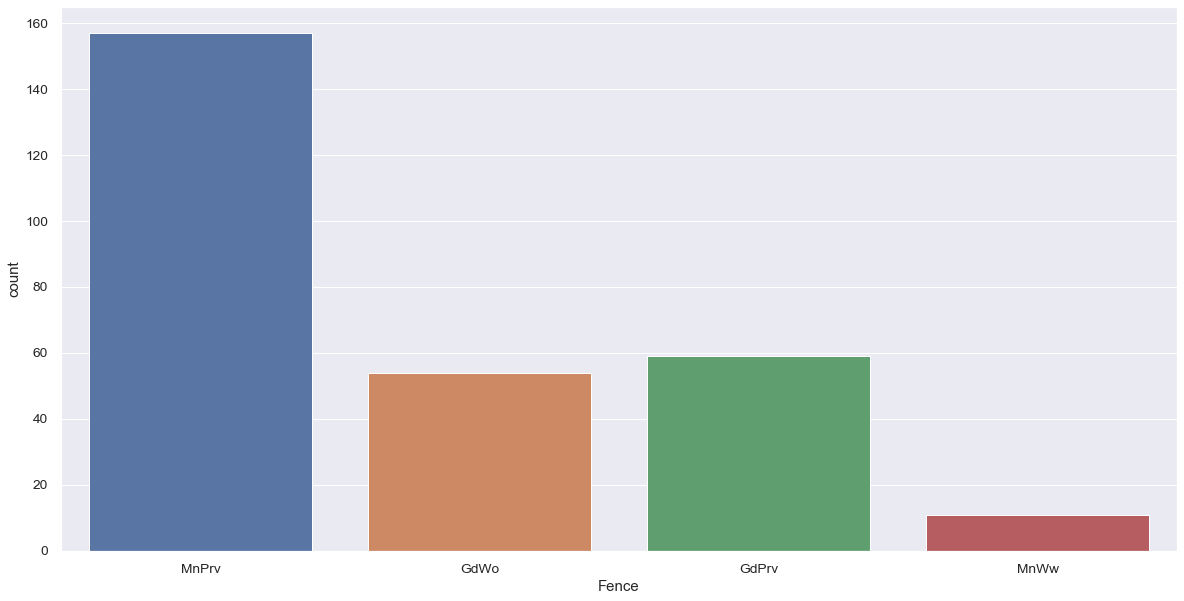

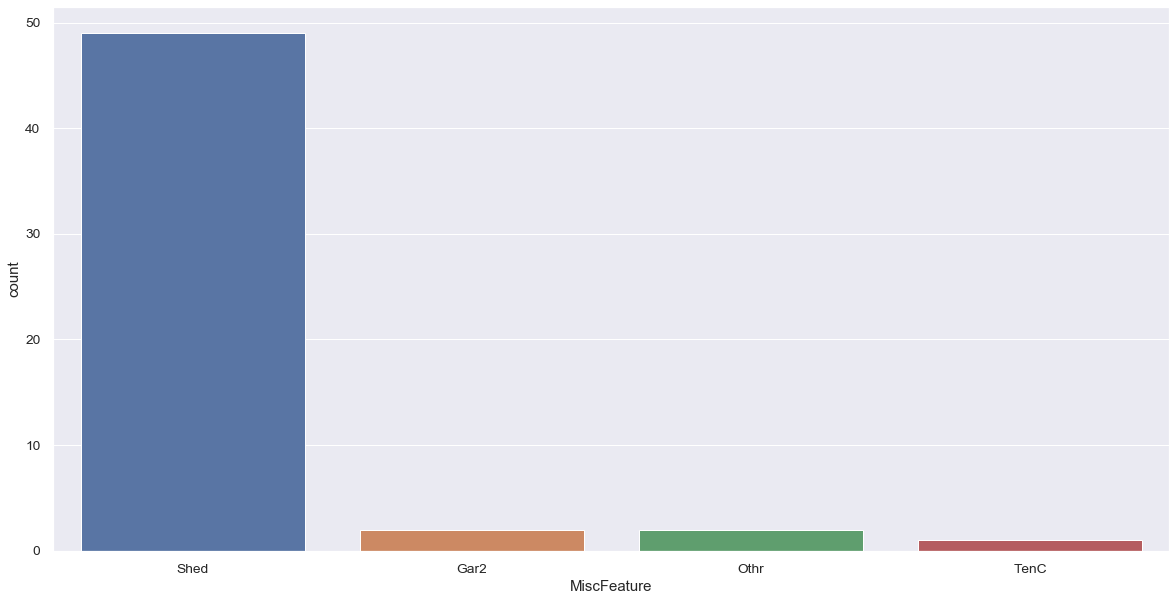

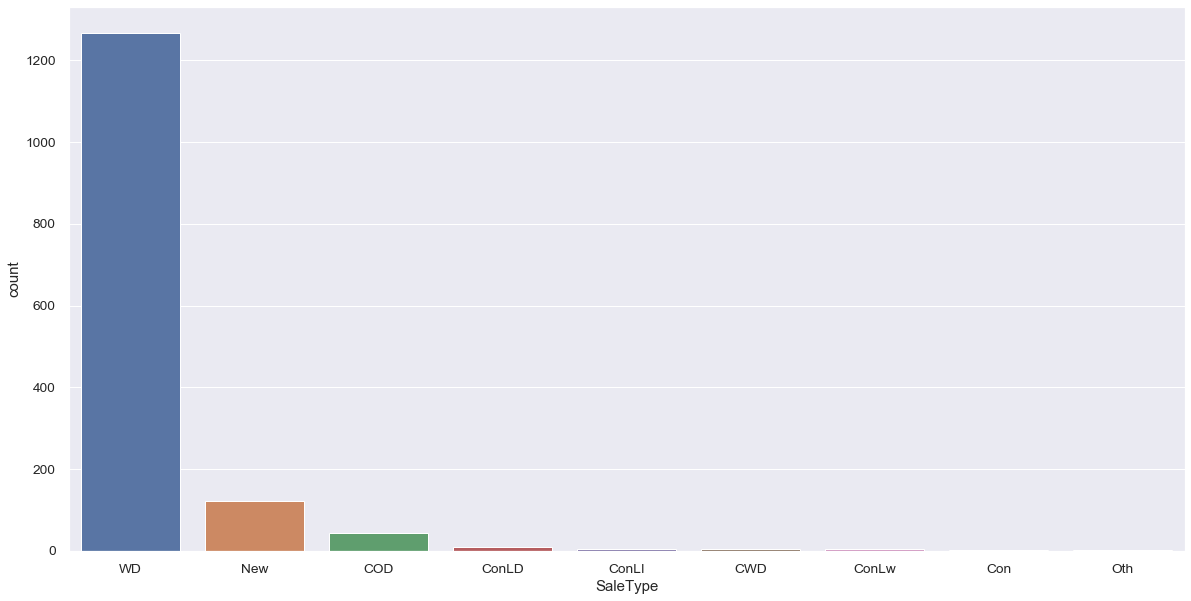

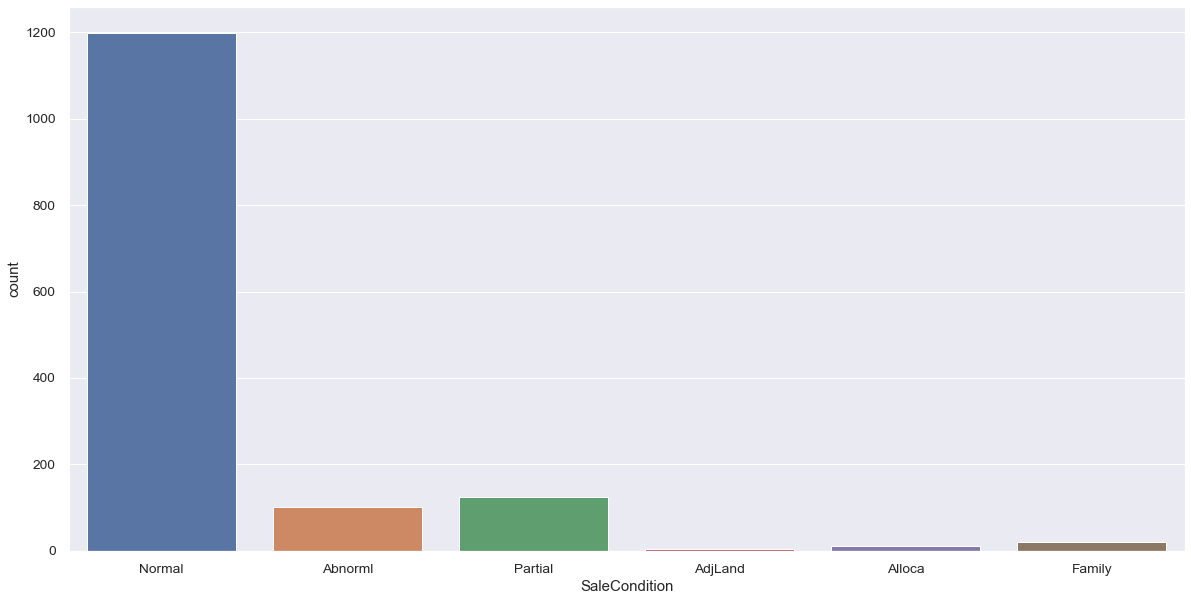

In [441]:
#count plots of levels of every categorical variable

for x in list(categorical_features_train_df.columns):
    plt.figure(figsize=(20,10)) 
    sns.countplot(categorical_features_train_df[x]);

### Data Preprocessing

#### Numerical Features

In [442]:
#checking the null values of numerical columns dataframe

numerical_features_train_df.isnull().any()

Id               False
MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [443]:
#Imputing the missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numerical_features_train_df['LotFrontage'] = imputer.fit_transform(numerical_features_train_df[['LotFrontage']])
numerical_features_train_df['MasVnrArea'] = imputer.fit_transform(numerical_features_train_df[['MasVnrArea']])
numerical_features_train_df['GarageYrBlt'] = imputer.fit_transform(numerical_features_train_df[['GarageYrBlt']])

In [444]:
#making sure that all nulls are filled

numerical_features_train_df.isnull().sum().sum()

0

In [445]:
numerical_features_train_df.isnull().sum().sum()

0

In [446]:
# Checking for skewness

from scipy.stats import skew 
skewness = numerical_features_train_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

In [447]:
# Log transformation applied only for skewness > 5

numerical_features_train_df['MiscVal'] = np.log1p(numerical_features_train_df['MiscVal'])
numerical_features_train_df['PoolArea'] = np.log1p(numerical_features_train_df['PoolArea'])
numerical_features_train_df['LotArea'] = np.log1p(numerical_features_train_df['LotArea'])
numerical_features_train_df['3SsnPorch'] = np.log1p(numerical_features_train_df['3SsnPorch'])
numerical_features_train_df['LowQualFinSF'] = np.log1p(numerical_features_train_df['LowQualFinSF'])

In [448]:
# Checking again after skewness 

from scipy.stats import skew 
skewness = numerical_features_train_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
LotArea          -0.137263
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
G

#### Categorical Features

In [449]:
#checking the null values in dataframe of categorical features

categorical_features_train_df.isnull().sum().sum()

6617

In [451]:
#checking the missing values in the dataframe of every categorical variable

categorical_features_train_df.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [452]:
#list of ordinal variable

ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [453]:
ordinal_features_df = train[ordinal_features]

In [454]:
ordinal_features_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN


In [455]:
#total null values in ordinal features dataframe

ordinal_features_df.isnull().sum().sum()

2379

In [456]:
#filling the 'NaN' with 'UNKNOWN'

ordinal_features_df.fillna('UNKNOWN', inplace=True)

In [457]:
#making sure that there are no missing values in ordinal dataframe

ordinal_features_df.isnull().sum().sum()

0

In [458]:
#mapping

scale_mapper = {'Ex': 5, 
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'UNKNOWN': 0
               }

In [459]:
for col in ordinal_features :
    ordinal_features_df[col] = ordinal_features_df[col].map(scale_mapper)
    print(ordinal_features_df[col])

0       4
1       3
2       4
3       3
4       4
5       3
6       4
7       3
8       3
9       3
10      3
11      5
12      3
13      4
14      3
15      3
16      3
17      3
18      3
19      3
20      4
21      3
22      4
23      3
24      3
25      4
26      3
27      4
28      3
29      3
       ..
1430    4
1431    3
1432    3
1433    3
1434    3
1435    4
1436    3
1437    5
1438    3
1439    3
1440    3
1441    4
1442    5
1443    3
1444    4
1445    3
1446    3
1447    4
1448    3
1449    3
1450    3
1451    4
1452    3
1453    3
1454    4
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1460, dtype: int64
0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      4
25      3
26      3
27      3
28      3
29      3
       ..
1430    3
1431    3
1432    3
1433  

In [460]:
ordinal_features_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [461]:
#list of nominal features

nominal_features_ohe = [
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
        'Electrical', 'Functional', 'GarageType', 'GarageFinish',
        'PavedDrive', 'SaleType', 'SaleCondition', 'Fence', 'MiscFeature','Alley']

In [462]:
nominal_features_ohe = train[nominal_features_ohe]

In [463]:
nominal_features_ohe.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition,Fence,MiscFeature,Alley
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml,NaN,NaN,NaN
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Typ,Attchd,RFn,Y,WD,Normal,NaN,NaN,NaN


In [464]:
nominal_features_ohe.shape

(1460, 33)

In [465]:
#checking the null values in nominal features dataframe

nominal_features_ohe.isnull().sum().sum()

4238

In [466]:
#filling the missing values with UNKNOWN

nominal_features_ohe.fillna('UNKNOWN', inplace=True)

In [467]:
nominal_features_ohe.isnull().sum().sum()

0

In [468]:
#Applying OneHotEncoding 

nominal_features_ohe = pd.get_dummies(nominal_features_ohe)

In [469]:
nominal_features_ohe.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,Fence_MnWw,Fence_UNKNOWN,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_UNKNOWN,Alley_Grvl,Alley_Pave,Alley_UNKNOWN
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [470]:
y = numerical_features_train_df['SalePrice']

In [471]:
del numerical_features_train_df['SalePrice']

In [472]:
merged_df = pd.concat([numerical_features_train_df, ordinal_features_df, nominal_features_ohe], axis=1)

In [473]:
merged_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fence_MnWw,Fence_UNKNOWN,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_UNKNOWN,Alley_Grvl,Alley_Pave,Alley_UNKNOWN
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,1,0,0,1
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,0,1,0,0,0,0,1,0,0,1
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,1,0,0,1
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,0,1,0,0,0,0,1,0,0,1
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,1,0,0,1


In [474]:
merged_df.isnull().sum().sum()

0

In [475]:
merged_df.shape

(1460, 265)

In [476]:
merged_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fence_MnWw,Fence_UNKNOWN,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_UNKNOWN,Alley_Grvl,Alley_Pave,Alley_UNKNOWN
0,1,60,65.0,9.042040,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,1,0,0,1
1,2,20,80.0,9.169623,6,8,1976,1976,0.0,978,...,0,1,0,0,0,0,1,0,0,1
2,3,60,68.0,9.328212,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,1,0,0,1
3,4,70,60.0,9.164401,7,5,1915,1970,0.0,216,...,0,1,0,0,0,0,1,0,0,1
4,5,60,84.0,9.565284,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,1,0,0,1


In [477]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [478]:
# Performing the Scaling 

from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler() 
final_df_scaled_rs = pd.DataFrame(scaler.fit_transform(merged_df), columns = list(merged_df))
final_df_scaled_rs.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fence_MnWw,Fence_UNKNOWN,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_UNKNOWN,Alley_Grvl,Alley_Pave,Alley_UNKNOWN
0,-1.000000,0.2,-0.210526,-0.267660,0.5,0.0,0.652174,0.243243,1.193303,0.452790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998629,-0.6,0.578947,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.997258,0.2,-0.052632,0.399288,0.5,0.0,0.608696,0.216216,0.986301,0.143910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.995888,0.4,-0.473684,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.994517,0.2,0.789474,0.951802,1.0,0.0,0.586957,0.162162,2.130898,0.381186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
del final_df_scaled_rs['Id']

In [480]:
final_df_scaled_rs.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Fence_MnWw', 'Fence_UNKNOWN', 'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC', 'MiscFeature_UNKNOWN',
       'Alley_Grvl', 'Alley_Pave', 'Alley_UNKNOWN'],
      dtype='object', length=264)

In [481]:
X = final_df_scaled_rs

In [482]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_MnWw,Fence_UNKNOWN,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_UNKNOWN,Alley_Grvl,Alley_Pave,Alley_UNKNOWN
0,0.2,-0.210526,-0.267660,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.578947,0.029682,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.052632,0.399288,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.473684,0.017513,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.789474,0.951802,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [483]:
X.isnull().sum().sum()

0

## Modeling

In [484]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

### Linear Regression

In [485]:
#Without Hyper Parameters Tuning
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state =1 )
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
#print ("training score:", train_score) 
#print ("test score: ", test_score)
from sklearn import metrics
print("R-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

R-squared: 0.8330376351246185
Mean Absolute Error (MAE): 20931.061682657866


In [486]:
#gridsearch cv for linear regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
model1 = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
modelgcv = GridSearchCV(model1, param_grid=params, n_jobs=8,  verbose=2)
modelgcv.fit(X_train,y_train)
print("Best Hyper Parameters:\n",modelgcv.best_params_)
prediction=modelgcv.predict(X_test)
train_score=modelgcv.score(X_train,y_train)
test_score=modelgcv.score(X_test,y_test)
#print ("training score:", train_score) 
#print ("test score: ", test_score)
from sklearn import metrics
print("\nR-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}

R-squared: 0.8330376351246185
Mean Absolute Error (MAE): 20931.061682657866


[Parallel(n_jobs=8)]: Done  22 out of  24 | elapsed:    2.5s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    2.5s finished


### KNN Regression

In [487]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor(n_jobs=8)
model2.fit(X_train,y_train)
prediction=model2.predict(X_test)
train_score=model2.score(X_train,y_train)
test_score=model2.score(X_test,y_test)
#print ("training score:", train_score) 
#print ("test score: ", test_score)
from sklearn.metrics import r2_score
print("R-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

R-squared: 0.32786777537745393
Mean Absolute Error (MAE): 30355.697260273973


In [488]:
#With Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],
          'n_jobs':[-1]}
model_knn = GridSearchCV(model, param_grid=params,n_jobs=8, verbose=2)
model_knn.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model_knn.best_params_)
prediction=model_knn.predict(X_test)
train_score=model_knn.score(X,y)
test_score=model_knn.score(X_test,y_test)
#print ("training score:", train_score) 
#print ("test score: ", test_score)
from sklearn import metrics
print("\nR-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 108 out of 108 | elapsed:    4.6s finished


Best Hyper Parameters:
 {'algorithm': 'brute', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}

R-squared: 0.2782531095949118
Mean Absolute Error (MAE): 30473.543971582018


### Lasso Regression

In [489]:
#Without Hyper Parameters Tuning
#Lasso

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
prediction = lasso.predict(X_test)

print("\nR-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))


R-squared: 0.8407413232358443
Mean Absolute Error (MAE): 20565.497424309087


In [490]:
#With Hyper Parameters Tuning and grid search
#Lasso

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30, 20, 45)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
clf.fit(X, y)

train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
print("Best Hyper Parameters:\n",clf.best_params_)
prediction=clf.predict(X_test)

from sklearn import metrics
print("\nR-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:  5.9min finished


Best Hyper Parameters:
 {'alpha': 0.14907119849998599}

R-squared: 0.9336679351002641
Mean Absolute Error (MAE): 15148.615877451173


### Ridge Regression

In [491]:
#Without Hyper Parameters Tuning
#Ridge

from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge() 
rr.fit(X_train, y_train)
prediction = rr.predict(X_test)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("R-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

R-squared: 0.83843118023832
Mean Absolute Error (MAE): 20157.485609494022


In [492]:
#With Hyper Parameters Tuning and grid search
#Ridge

ridge = Ridge(random_state=0, max_iter=10000)
alphas = [200, 230, 250,265, 270, 275, 290, 300, 500]
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
model1 = GridSearchCV(ridge, tuned_parameters, cv=n_folds, n_jobs=8, verbose=2)
model1.fit(X, y)

print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)

from sklearn import metrics
print("\nR-squared:",metrics.r2_score(prediction,y_test))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, prediction))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters:
 {'alpha': 200}

R-squared: 0.8422484466410722
Mean Absolute Error (MAE): 17778.074479771483


[Parallel(n_jobs=8)]: Done  45 out of  45 | elapsed:    0.3s finished
